In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re
import fitz
import statistics
import time
import os

from matplotlib import dates
from matplotlib.dates import DateFormatter
from IPython.display import Image
from pypdf import PdfReader
from difflib import SequenceMatcher
    
pd.set_option("display.max_rows", 100)
pd.set_option('display.max_columns', 500)

palette = ['#4A4E69','#858585', '#C0362C', '#505050', '#353535']
sns.set_theme(style="darkgrid")

In [2]:
grand_prix_name = "qatar"
year_name = '2022'
browser_interface = True
fullscreen = False

In [3]:
# если название гран-при состоит из более, чем одного слова 
grand_prix_name_split = grand_prix_name.split()
grand_prix_name_elements_num = len(grand_prix_name_split)
if grand_prix_name_elements_num > 1:
    # заменим пробелы на '_'
    grand_prix_name_file = '_'.join(grand_prix_name_split)
# если нет, то создадим переменную
else:
    grand_prix_name_file = grand_prix_name

analysis_file_name = year_name + '_' + grand_prix_name_file + '_analysis.pdf'
lapchart_file_name = year_name+ '_' + grand_prix_name_file + '_lapchart.pdf'

In [4]:
if not os.path.isfile(analysis_file_name) and not os.path.isfile(lapchart_file_name):
    %run -i 'download_file.py'

In [5]:
grand_prix_name_full = [
    'Grand Prix of Qatar',
    'Pertamina Grand Prix of Indonesia',
    'Gran Premio Michelin de la República Argentina',
    'Red Bull Grand Prix of The Americas',
    'Grande Prémio Tissot de Portugal',
    'Gran Premio Red Bull de España',
    'Shark Grand Prix de France',
    "Gran Premio d'Italia Oakley",
    'Gran Premi Monster Energy de Catalunya',
    'Liqui Moly Motorrad Grand Prix Deutschland',
    'Motul TT Assen',
    'Monster Energy British Grand Prix',
    'CryptoData Motorrad Grand Prix von Österreich',
    'Gran Premio Gryfyn di San Marino e della Riviera di Rimini',
    'Gran Premio Animoca Brands de Aragón',
    'Motul Grand Prix of Japan',
    'OR Thailand Grand Prix',
    'Animoca Brands Australian Motorcycle Grand Prix',
    'Petronas Grand Prix of Malaysia',
    'Gran Premio Motul de la Comunitat Valenciana'
]

In [6]:
riders_list = [
    'Jorge MARTIN', 'Enea BASTIANINI', 'Marc MARQUEZ',
    'Jack MILLER', 'Aleix ESPARGARO', 'Pol ESPARGARO',
    'Brad BINDER', 'Joan MIR', 'Francesco BAGNAIA',
    'Alex RINS', 'Fabio QUARTARARO', 'Franco MORBIDELLI',
    'Johann ZARCO', 'Miguel OLIVEIRA', 'Marco BEZZECCHI',
    'Takaaki NAKAGAMI', 'Luca MARINI', 'Alex MARQUEZ', 
    'Maverick VIÑALES', 'Andrea DOVIZIOSO', 'Fabio DI GIANNANTONIO', 
    'Remy GARDNER', 'Raul FERNANDEZ', 'Darryn BINDER',
    'Stefan BRADL', 'Lorenzo SAVADORI', 'Kazuki WATANABE',
    'Cal CRUTCHLOW', 'Michele PIRRO', 'Tetsuta NAGASHIMA'
]

In [7]:
nation_list = [
    'SPA', 'ITA', 'SPA',
    'AUS', 'SPA', 'SPA',
    'RSA', 'SPA', 'ITA',
    'SPA', 'FRA', 'ITA',
    'FRA', 'POR', 'ITA',
    'JPN', 'ITA', 'SPA',
    'SPA', 'ITA', 'ITA',
    'AUS', 'SPA', 'RSA',
    'GER', 'ITA', 'JPN',
    'GBR', 'ITA', 'JPN'
]

In [8]:
riders_numbers_list = [
    '89', '23', '93',
    '43', '41', '44',
    '33', '36', '63',
    '42', '20', '21',
    '5', '88', '72',
    '30', '10', '73',
    '12', '4', '49',
    '87', '25', '40',
    '6', '32', '92',
    '35', '51', '45'
]

In [9]:
team_list = [
    'Pramac Racing', 'Gresini Racing MotoGP', 'Repsol Honda Team',
    'Ducati Lenovo Team', 'Aprilia Racing', 'Repsol Honda Team',
    'Red Bull KTM Factory Racing', 'Team SUZUKI ECSTAR', 'Ducati Lenovo Team',
    'Team SUZUKI ECSTAR', 'Monster Energy Yamaha MotoGP', 'Monster Energy Yamaha MotoGP',
    'Pramac Racing', 'Red Bull KTM Factory Racing', 'Mooney VR46 Racing Team',
    'LCR Honda IDEMITSU', 'Mooney VR46 Racing Team', 'LCR Honda CASTROL', 
    'Aprilia Racing', 'WithU Yamaha RNF MotoGP Team', 'Gresini Racing MotoGP', 
    'Tech3 KTM Factory Racing', 'Tech3 KTM Factory Racing', 'WithU Yamaha RNF MotoGP Team',
    'Repsol Honda Team', 'Aprilia Racing', 'Team SUZUKI ECSTAR',
    'WithU Yamaha RNF MotoGP Team', 'Aruba.it Racing', 'LCR Honda IDEMITSU'
]

In [10]:
manufacturer_list = [
    'DUCATI', 'DUCATI', 'HONDA',
    'DUCATI', 'APRILIA', 'HONDA',
    'KTM', 'SUZUKI', 'DUCATI',
    'SUZUKI', 'YAMAHA', 'YAMAHA',
    'DUCATI', 'KTM', 'DUCATI',
    'HONDA', 'DUCATI', 'HONDA',
    'APRILIA', 'YAMAHA', 'DUCATI',
    'KTM', 'KTM', 'YAMAHA',
    'HONDA', 'APRILIA', 'SUZUKI',
    'YAMAHA', 'DUCATI', 'HONDA'
]

In [11]:
riders_dict = {
    'rider': riders_list,
    'nation': nation_list,
    'number': riders_numbers_list,
    'team': team_list,
    'manufacturer': manufacturer_list
}

In [12]:
# датафрейм с информацией обо всех гонщиках чемпионата
riders_df = pd.DataFrame(riders_dict)
riders_df.index += 1

In [13]:
riders_df

,rider,nation,number,team,manufacturer
1,Jorge MARTIN,SPA,89,Pramac Racing,DUCATI
2,Enea BASTIANINI,ITA,23,Gresini Racing MotoGP,DUCATI
3,Marc MARQUEZ,SPA,93,Repsol Honda Team,HONDA
4,Jack MILLER,AUS,43,Ducati Lenovo Team,DUCATI
5,Aleix ESPARGARO,SPA,41,Aprilia Racing,APRILIA
6,Pol ESPARGARO,SPA,44,Repsol Honda Team,HONDA
7,Brad BINDER,RSA,33,Red Bull KTM Factory Racing,KTM
8,Joan MIR,SPA,36,Team SUZUKI ECSTAR,SUZUKI
9,Francesco BAGNAIA,ITA,63,Ducati Lenovo Team,DUCATI
10,Alex RINS,SPA,42,Team SUZUKI ECSTAR,SUZUKI


In [14]:
# список имен гонщиков с указанием команды, номера и национальности
riders_list_w_team = \
    [(a + ' ' + b + ' ' + c + ' ' + d) for a, b, c, d in \
        zip(riders_numbers_list, team_list, nation_list, riders_list)]

In [15]:
riders_list_w_team[:5]

['89 Pramac Racing SPA Jorge MARTIN',
 '23 Gresini Racing MotoGP ITA Enea BASTIANINI',
 '93 Repsol Honda Team SPA Marc MARQUEZ',
 '43 Ducati Lenovo Team AUS Jack MILLER',
 '41 Aprilia Racing SPA Aleix ESPARGARO']

In [16]:
def extract_pdf_pypdf(file_name_pdf):
    
    '''
    Функция извлекает данные из файла .pdf с помощью библиотеки pyPDF
    
    Аргументы
    ---------
    file_name_pdf - название файла
    
    Возвращает
    ----------
    data - список строковых переменных
    '''
    
    data_extracted = PdfReader(file_name_pdf) 
    pages_num = len(data_extracted.pages)
    data = []
    
    for i in range(pages_num):
        page = data_extracted.pages[i]
        data += page.extract_text().split('\n')
        
    return data


def extract_pdf_pymupdf(file_name_pdf):
    
    '''
    Функция извлекает данные из файла .pdf с помощью библиотеки PyMyPDF
    
    Аргументы
    ---------
    file_name_pdf - название файлы
    
    Возвращает
    ----------
    data - список строковых переменных
    '''
    
    data_extracted = fitz.open(file_name_pdf)
    pages_num = len(data_extracted)
    data = []
    
    for i in range(pages_num):
        page = data_extracted[i]
        data += page.get_text().split('\n')
    
    return data

In [17]:
# извлечение данных из .pdf для riders_started
lapchart_raw_pypdf = extract_pdf_pypdf(lapchart_file_name)

# извлечение данных из .pdf для lapchart
lapchart_raw_pymupdf = extract_pdf_pymupdf(lapchart_file_name)

# извлечение данных из .pdf для analysis
analysis_raw = extract_pdf_pypdf(analysis_file_name)

#### Датафрейм с данными гонщиков в порядке их старта (riders_started_df)

In [18]:
# сырые данные (пример данных, индексы 0-15, последние 5)
lapchart_raw_pypdf[:15] + lapchart_raw_pypdf[-5:]

['GRAND PRIX OF QATAR',
 'Results and timing service provided by',
 '5380 m.usail International Circ u',
 'MotoGP™',
 'Race',
 'Lap Chart 31',
 'Pos',
 'Grid 89 1 ',
 '23 2 ',
 '93 3 ',
 '43 4 ',
 '41 5 ',
 '44 6 ',
 '33 7 ',
 '36 8 ',
 'within 60 days of the event related to those data/results and always provided that copyright symbol appears together as follows  below.',
 '© DORNA, 2022',
 'Official MotoGP Timing by ',
 'www.mot ogp.comTISSOT',
 '']

In [19]:
def riders_started_list_create(lapchart_raw_pypdf):

    '''
    Функция создает список номеров гонщиков с данными в порядке их старта
    
    Аргументы
    ---------
    - lapchart_raw_pypdf - данные, извлеченные с помощью pyPDF
    
    Возвращает
    ----------
    - riders_started_list - список с позициями и номерами стартовавших гонщиков
    '''
    
    lap = lapchart_raw_pypdf.copy()

    # определяем строку, с которой начинается
    # список стартовавших пилотов и её индекс
    # (эта строка - единственная в списке, которая начинается со слова Grid)
    grid_line = [i for i in lap if 'Grid' in i]
    grid_line_index = lap.index(''.join(grid_line))

    # удаляем слово 'Grid' из строки
    lap[grid_line_index] = ' '.join(lap[7].split()[1:])

    # начиная с этой строки заносим в отдельный список строки, 
    # состоящие из двух элементов, длина которых не более 6 символов;
    # этим условиям соответствуют только строки с номерами
    # и стартовыми позициями гонщиков
    riders_started_list = [line for line in lap[grid_line_index:] \
                           if len(line.split()) == 2 and len(line) <= 6]
    
    # разделим каждый элемент списка на две составляющие:
    # первая - это номер гонщика, вторая - стартовая позиция
    riders_started_list = [i.split() for i in riders_started_list]

    return riders_started_list

In [20]:
# формируем из сырых данных список номеров стартовавших пилотов с указанием позиций
riders_started_list = riders_started_list_create(lapchart_raw_pypdf)

In [21]:
riders_started_list[:7]

[['89', '1'],
 ['23', '2'],
 ['93', '3'],
 ['43', '4'],
 ['41', '5'],
 ['44', '6'],
 ['33', '7']]

In [22]:
def riders_started_dataframe_create(riders_started_list, riders_df):

    '''
    Функция формирует датафрейм с данными гонщиков в порядке их старта
    
    Аргументы
    ---------
    - riders_started_list - список с номерами и позициями стартовавших пилотов
    - riders_df - датафрейм с данными всех пилотов
    
    Возвращает
    ----------
    - riders_started_df - датафрейм с данными стартовавших пилотов
    
    '''
    
    # создаем датафрейм
    riders_started_df = pd.DataFrame(
        columns=[
            'rider',
            'nation',
            'number',
            'team',
            'manufacturer'
    ])
    
    # перебираем список riders_started_list и 
    # номера гонщиков в датафрейме
    for element in riders_started_list:
        for number_df in riders_df['number']:
            
            # извлекаем номер стартовавшего пилота из
            # списка riders_started_list
            number_list = element[0].replace(' ', '')
            
            # когда номера совпадают
            if number_list == number_df:

                # итоговый датафрейм дополняется строкой
                # из датафрейма с данными гонщиков,
                # которая соответствует номеру этого гонщика
                riders_started_df = pd.concat([
                    riders_started_df,
                    riders_df.loc[riders_df.index[riders_df['number'] == number_df]]
                ], axis=0)

    
    riders_started_df = riders_started_df.reset_index(drop=True)
    riders_started_df.index += 1
    
    return riders_started_df

In [23]:
# создаем с данными гонщиков в порядке их старта
riders_started_df = riders_started_dataframe_create(riders_started_list, riders_df)

In [24]:
riders_started_df[:5]

,rider,nation,number,team,manufacturer
1,Jorge MARTIN,SPA,89,Pramac Racing,DUCATI
2,Enea BASTIANINI,ITA,23,Gresini Racing MotoGP,DUCATI
3,Marc MARQUEZ,SPA,93,Repsol Honda Team,HONDA
4,Jack MILLER,AUS,43,Ducati Lenovo Team,DUCATI
5,Aleix ESPARGARO,SPA,41,Aprilia Racing,APRILIA


#### Датафрейм с позициями по кругам (lapchart_df)

In [25]:
# сырые данные (пример данных, индексы с 0 по 5, с 75 по 85, последние 8)
lapchart_raw_pymupdf[:5] + lapchart_raw_pymupdf[75:85] + lapchart_raw_pymupdf[-8:]

['GRAND PRIX OF QATAR',
 'Results and timing service provided by',
 '5380 m.',
 'usail International Circu',
 'MotoGP™',
 '4 87 49 25',
 ' 7 44 33 23 93 41 36 42 89 20 63 73 88 30',
 '5 21 10 12 40',
 '4 87 49 25',
 ' 8 44 33 23 93 41 36 42 89 20 63 88 73 30',
 '5 21 10 12',
 '4 40 87 25 49',
 ' 9 44 33 23 93 41 36 42 89 63 20 88 73 30',
 '5 21 10 12',
 '4 40 87 25 49',
 'These data/results cannot be reproduced, stored and/or transmitted in whole or in part by any manner of electronic, mechanical, photocopying, recording, broadcasting or otherwise now ',
 'known or herein after developed without the previous express consent by the copyright owner, except for reproduction in daily press and regular printed publications on sale to the public ',
 'within 60 days of the event related to those data/results and always provided that copyright symbol appears together as follows below.',
 '© DORNA, 2022',
 'Official MotoGP Timing by ',
 'www.motogp.com',
 'TISSOT',
 '']

In [26]:
def lapchart_cut(lapchart_raw_pymupdf):
    
    '''
    Функция удаляет все данные, кроме строк с позициями и номерами кругов
    
    Аргументы
    ---------
    - lapchart_raw_pymupdf - сырые данные, извлеченные с помощью PyMuPdf (fitz)
    
    Возвращает
    ----------
    - lapchart - обрезанные данные, которые содержат неотформатированные строки с позициями
    '''
    
    # обрезаем первые 15 строк данных, так как они не содержат
    # нужную нам информацию
    lapchart = lapchart_raw_pymupdf[15:].copy()

    # определяем индекс строк 'Lapped rider', 
    # потому что данные, находящиеся ниже неё нам не нужны
    for line in lapchart:
        index = lapchart.index('Lapped rider')
    
    # удаляем эти данные
    lapchart = lapchart[:index]
    
    # находим индекс первой строки-начала ряда покруговок
    # эта строка будет состоять из нескольких элементов (>1)
    # в отличии от предыдущих (в которых записаны по порядку
    # номера и стартовы позиции)
    for line in lapchart:
        if len(line.split()) > 1:
            index_first = lapchart.index(line)
            break

    # удалеяем предыдущие строки, которые состоят из одного элемента
    lapchart = lapchart[index_first:-4]
    
    return lapchart

In [27]:
# обрезаем все ненужные строки в данных, 
# оставляя только строки со сменой позиций
lapchart_pymupdf = lapchart_cut(lapchart_raw_pymupdf)

In [28]:
lapchart_pymupdf[:5] + lapchart_pymupdf[-5:]

[' 1 44 93 33 36 23 41 89 20 42 43 73 88 30 63 72 21',
 '4 10',
 '5 12 40 87 25 49',
 ' 2 44 93 33 36 23 41 89 20 42 73 63 43 30 88 72 21 10',
 '5',
 '5 30 21 12 10',
 '4 87 40 49 25',
 ' 22 23 33 44 41 93 36 42',
 '5 20 30 21 12 10',
 '4 87 40 49 25']

In [29]:
def lapchart_list_create(lapchart_pymupdf):

    '''
    Функция принимает необработанные данные в виде списка строк.
    В первую очередь из общего числа строк определяются те, 
    с которых начинаются ряды с позициями (строка-начало).
    После этого фиксируется расстояние между этими строками.
    Соответственно, все строки, попадающие в это расстояние, 
    принадлежат одному ряду, который начинается с вышестоящей строки-начала.
    
    Аргументы
    ---------
    - lapchart_pymupdf - данные, подготовленные функцией lapchart_cut
    
    Возвращает
    ----------
    - lapchart_final - преобразованные строки
    '''
    
    lapchart = lapchart_pymupdf.copy()
    
    # создадим список индексов строк, с которых начинаются
    # ряды покруговки (первый элемент таких строк всегда пробел - ' ')
    line_start_index = \
        [lapchart.index(line) for line in lapchart if line[0] == ' ']

    # создадим список, который будем наполнять отфрматированными строками
    lapchart_final = []

    # для каждой строки списка выбираем ту, 
    for line in lapchart:
        for element in line_start_index:
            # индекс которой равен индексу начальной строки ряда покруговки
            # (индексы этих строк содержатся в списке line_start_index)
            if lapchart.index(line) == element:

                # чтобы избежать выхода за пределы индексов списка line_start_index,
                # предварительно рассчитаем максимальный индекс этого списка и
                # индекс текущего элемента в цикле (element)
                max_index = len(line_start_index) - 1
                element_index = line_start_index.index(element)

                # создаём пустой список, который в итоге станет
                # рядом покруговки
                line_list = []

                # если индекс элемента не равен максимальному (то есть, элемент не
                # является последним в списке line_start_index)
                if element_index < max_index:

                    # то мы находим индекс следующего элемента, 
                    # добавляя к индексу текущего элемента единицу
                    element_next_index = line_start_index.index(element) + 1
                    # зная индекс следующего элемента, присваеваем ему переменную
                    element_next = line_start_index[element_next_index]
                    # и считаем разницу между элементами списка line_start_index
                    # эта разница покажет диапазон (range) строк, которые находятся 
                    # между текущей строкой-началом ряда и следующей строкой-началом ряда
                    index_diff = element_next - element

                    # зная число строк между начальными строками ряда,
                    # можно присоединить их к текущей начальной строке ряда;
                    
                    # для этого на всём диапазоне index_diff
                    for i in range(index_diff):
                        # наполняем пустой список текущей строкой lapchart[element] 
                        # (которая является строкой-началом ряда)
                        # и нижележащими строками, которые являются строками-продолжением ряда
                        line_list.append(lapchart[element+i])

                    # объединяем все элементы получившегося списка в одну строку
                    line_list = ' '.join(line_list)

                # else необходим на случай, когда индекс элемента списка line_start_index
                # равен максимальному (и соответственно нет возможности 
                # рассчитать последующий индекс и разницу index_diff)
                else:
                    # в этом случае мы уже знаем индекс текущей строки-начала ряда
                    # он равен element
                    lapchart_current_index = element

                    # и к строке-началу ряда нам нужно добавить все оставшиеся строки
                    # исходного списка lapchart,
                    # то есть индекс последней строки будет равен
                    lapchart_last_index = len(lapchart) - 1

                    # так же считаем разницу, чтобы понять число строк, 
                    # которые будут добавлены к текущей строке-началу ряда
                    index_diff = lapchart_last_index - lapchart_current_index

                    # и по аналогии с предыдущим циклом if наполняем итоговую строку
                    # единственное отличие в том, что range берется не от index_diff,
                    # а от (index_diff+1)
                    # это связано с тем, что в предыдущем цикле if мы работаем с индксами списка
                    # line_start_index и последний элемент диапазон не должен включаться в цикл

                    # но здесь мы работаем с индексами строк исходного списка lapchart,
                    # и индекс крайней строки должен быть включен в диапазон,
                    # поэтому здесь (index_diff+1)
                    for i in range(index_diff+1):
                        line_list.append(lapchart[element+i])
                    line_list = ' '.join(line_list)

                lapchart_final.append(line_list)
    
    return lapchart_final

In [30]:
# переформатируем строки в данных и получаем список,
# элементы которого это ряды со сменой позиций
lapchart_pymupdf = lapchart_list_create(lapchart_pymupdf)

In [31]:
lapchart_pymupdf[:5]

[' 1 44 93 33 36 23 41 89 20 42 43 73 88 30 63 72 21 4 10 5 12 40 87 25 49',
 ' 2 44 93 33 36 23 41 89 20 42 73 63 43 30 88 72 21 10 5 4 12 87 40 25 49',
 ' 3 44 93 33 36 23 41 89 42 20 63 73 43 88 30 72 21 5 10 4 12 40 87 49 25',
 ' 4 44 93 33 36 23 41 89 42 20 63 73 88 72 43 30 21 5 10 4 40 12 87 49 25',
 ' 5 44 93 33 36 23 41 89 42 20 63 73 88 72 30 43 5 21 10 12 40 87 4 49 25']

In [32]:
def lapchart_dataframe_create(lapchart_pymupdf, riders_started_df):

    '''
    Функция создает датафрейм с данными о позициях гонщиков круг за кругом
    
    Аргументы
    ---------
    - lapchart_pymupdf - данные, преобразованные функциями lapchart_cut,
                         lapchart_list_create
    - riders_started_df - список с данными гонщиков в порядке их старта
    
    Возвращает
    ----------
    - df датафрейм с рядами смен позиций
    
    '''
    
    # создаем список с названиями колонок датафрейма;
    # они соответствуют индексам датафрейма со стартовавшими гонщиками
    columns = [int(x) for x in riders_started_df.index]

    df = pd.DataFrame(
        columns = columns
    )

    # каждую строку
    for line in lapchart_pymupdf:
        # разбиваем на элементы и оставляем все элементы, кроме первого
        line_split = line.split()[1:]
        # преобразовываем строку в пандас серию
        row = pd.Series(line_split)
        # сдвигаем индекс на единицу (при добавлении в датафрейм)
        # эти индексы будут соответствовать названиям колонок
        # (и позициям, к примеру, 1-24)
        row.index += 1
        
        # добавляем эту строку в итоговый датафрейм
        df.loc[len(df), df.columns] = row
    
    # создаём ряд со стартовыми позициями
    start_row = riders_started_df['number']
    df.loc[-1] = start_row
    df.sort_index(inplace=True)
    
    # дополнительно сдвигаем индексы итогового датафрейма и заполняем 
    # ячейки None симолами '-'
    df.index += 1
    df = df.fillna('-')

    return df 

In [33]:
# формируем итоговый датафрейм с позициями по кругам
lapchart_df = lapchart_dataframe_create(lapchart_pymupdf, riders_started_df)

In [34]:
lapchart_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,89,23,93,43,41,44,33,36,63,42,20,21,5,88,72,30,10,73,12,4,49,87,25,40
1,44,93,33,36,23,41,89,20,42,43,73,88,30,63,72,21,4,10,5,12,40,87,25,49
2,44,93,33,36,23,41,89,20,42,73,63,43,30,88,72,21,10,5,4,12,87,40,25,49
3,44,93,33,36,23,41,89,42,20,63,73,43,88,30,72,21,5,10,4,12,40,87,49,25
4,44,93,33,36,23,41,89,42,20,63,73,88,72,43,30,21,5,10,4,40,12,87,49,25
5,44,93,33,36,23,41,89,42,20,63,73,88,72,30,43,5,21,10,12,40,87,4,49,25
6,44,33,93,23,36,41,89,42,20,63,73,88,72,30,5,43,21,10,40,12,4,87,49,25
7,44,33,23,93,41,36,42,89,20,63,73,88,30,5,21,10,12,40,4,87,49,25,-,-
8,44,33,23,93,41,36,42,89,20,63,88,73,30,5,21,10,12,4,40,87,25,49,-,-
9,44,33,23,93,41,36,42,89,63,20,88,73,30,5,21,10,12,4,40,87,25,49,-,-


#### Список кругов (laps_list)

In [35]:
def laps_list_create(lapchart_df):
    
    '''
    Функция создает список с номерами кругов
    
    Аргументы
    ---------
    - lapchart_df - датафрейм со сменой позиций
    
    Возвращает
    ----------
    - laps_list - список с номерми кругов
    '''
    
    laps_list = [x for x in lapchart_df.index]
    laps_list = laps_list[1:]
    
    return laps_list

In [36]:
laps_list = laps_list_create(lapchart_df)

In [37]:
laps_list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

#### Датафрейм с временами прохождения круга (analysis_df)

In [38]:
analysis_raw[:20]

['T2T3',
 'T4 PCrossing the finish line in pit lane Time from 1st intermed. to 2nd intermed.Time from 2nd intermed. to 3rd intermed.',
 'Time from 3rd intermediate to finish lineT1Time from finish line to 1st intermediate',
 'Lap Lap Tim e T1 T 2 T3 Spee d T4 Lap Lap Tim e T1 T 2 T3 Spee d T4*Lap / Sector time cancelled',
 'Tyre data subject to further updates**GRAND PRIX OF QATAR',
 'Results and timing service provided by',
 '5380 m.usail International Circ u',
 'MotoGP™',
 'Race',
 'Chronological Analysis of Performances 34',
 '23Gresini Racing MotoGPITA Enea BASTIANINI1stDUCATI',
 'Run # Front T yre Rear T yre 1 Slick-Soft Slick-Medium',
 'New Tyre New Tyre',
 "2'01.438 1 30.727 30.512 28.339 203.7 31.860",
 "1'54.953 2 25.060 30.273 28.346 350.6 31.274",
 "1'54.918 3 25.213 30.070 28.318 343.9 31.317",
 "1'54.991 4 25.090 30.094 28.378 336.4 31.429",
 "1'54.956 5 25.191 30.131 28.260 333.3 31.374",
 "1'54.680 6 25.115 30.094 28.207 338.5 31.264",
 "1'54.633 7 25.045 29.988 28.330 3

In [39]:
def line_cut(analysis_raw):
    
    '''
    Функция выявляет сдвоенную строку, обрезает её. 
    Первую половину обрезанной строки привязывает к текущему индексу.
    Вторую половину обрезанной строки привязывает к следующему индексу, сдвигая данные без потерь.
    
    Аргументы
    ---------
    analysis_raw - данные, извлеченные с помощью pyPDF
    
    Возвращает
    ----------
    text - преобразованные данные
    '''

    text = analysis_raw.copy()

    # для каждой строки в списке
    for line in text:
        # длина которой более 70 символов;
        
        # 70 символов берется потому, что длина стандартной записи
        # с временми круга равна 44; тогда длина стандартной сдвоенной линии
        # равна примерно 90 символов
        # 70 берется с запасом, потому что часто встречаются
        # нестандартные сдвоенные линии, которые содержат имена гонщиков; 
        # то есть, если линия выступет за пределы 45 элементов не сильно
        # (к примеру, ее длина равна 55), то лучше её не обрезать, 
        # так как в ней может содержаться имя гонщика
        if len(line) > 70:
            
            # вычисляем индекс этой строки
            line_index = text.index(line)
            # и индекс, по которому будет вставлена вторая половина
            # разбитой надвое строки
            line_next_index = line_index + 1
            
            # разбиваем строку на элементы
            line_split = line.split()
            # выбираем сдвоенный элемент, который необходимо
            # разбить на два (обычно это седьмой элемент в списке)
            element = line_split[6]
            # разбиваем этот элемент на символы
            element_split = list(element)
            
            # из плученных символов выбираем элементы, 
            # которые поместим в конец первой половины и 
            # начало второй половины исходной строки
            # (это первые шесть символов)
            element_current = ''.join(element_split[:6])
            element_next = ''.join(element_split[6:])
            
            # собираем первую половину строки
            # и добавляем в конец соответствующий элемент, 
            # посчитанный выше для первой половины исходной строки
            line_current = line_split[:6]
            line_current.append(element_current)
            
            # переформатируем полученную строку из списка элементов в строку string
            line_current = ' '.join(line_current)
            
            # повторяем те же операции для второй половины строки
            line_next = line_split[7:]
            line_next.insert(0, element_next)
            line_next = ' '.join(line_next)
            
            # добавляем полученные две новые строки в список
            # первую половину исходной строки привязываем к индексу исходной строки
            text[line_index] = line_current
            
            # вторую часть исходной строки к следующему индексу
            text[line_next_index:line_next_index] = [line_next]

    return text 

In [40]:
# разделяем сдвоенные строки и переносим вторую половину
# сдвоенной строки на следующую строку
analysis = line_cut(analysis_raw)

In [41]:
analysis[3:5] + analysis[15:20]

[' intermed.Time from 2nd intermed. to 3rd intermed.',
 'Time from 3rd intermediate to finish lineT1',
 '23Gresini Racing MotoGPITA Enea BASTIANINI1stDUCATI',
 'Run # Front T yre Rear T yre 1 Slick-Soft Slick-Medium',
 'New Tyre New Tyre',
 "2'01.438 1 30.727 30.512 28.339 203.7 31.860",
 "1'54.953 2 25.060 30.273 28.346 350.6 31.274"]

In [42]:
def transform_riders_name(analysis, riders_list_w_team):

    '''
    Функция преобразует имена гонщиков в исходных данных, удаляя лишние символы и 
    пробелы, приводя их к виду, заданному в списке riders_list_w_team.
    
    Аргументы
    ---------
    analysis - данные, извлеченные с помощью pyPDF и пребразованные функцией
               line_cut
    riders_list_w_team - список гонщиков
    
    Возвращает
    ----------
    text - данные, с преобразованными именами гонщиков
    '''

    text = analysis.copy()
    riders_finish_order_list = []
    
    # для каждой строки данных
    for line in text:
        # создаем словарь, в котором ключи - это имена гонщиков из списка riders_list_w_team,
        # и значения - индексы идентичности (индексы, которые характеризуют, насколько
        # данная строка похожа на имя гонщика в соответствующем ключе)
        equality_results = {}
        # сравниваем строку с именем каждого гонщика из списка riders_list_w_team
        for rider in riders_list_w_team:
            equality_rate = SequenceMatcher(
                a=line,
                b=rider).ratio()
            # и записываем индекс идентичности в словарь
            equality_results[rider] = equality_rate
        
        # определяем макисмальное значение 
        equality_rate_max = max(equality_results.values())
        
        # если это значение больше 0.7
        if equality_rate_max > 0.7:
            # вычисляем индекс текущей строки
            line_index = text.index(line)
            # определяем ключ этого максимального значения (то есть, имя
            # гонщика, которое максимально похоже на данную строку - индекс
            # более 0.7)
            equality_rate_max_rider = max(equality_results, key=equality_results.get)
            # меняем эту строку в данных на имя гонщика
            text[line_index] = equality_rate_max_rider
            
    return text

In [43]:
# заменяем сырые имена гонщиков на отформатированные из списка
analysis = transform_riders_name(analysis, riders_list_w_team)

In [44]:
# имя гонщика (здесь третья сверху строка) приведена виду, аналогичному
# именам в списке riders_list_w_team
analysis[3:5] + analysis[15:20]

[' intermed.Time from 2nd intermed. to 3rd intermed.',
 'Time from 3rd intermediate to finish lineT1',
 '23 Gresini Racing MotoGP ITA Enea BASTIANINI',
 'Run # Front T yre Rear T yre 1 Slick-Soft Slick-Medium',
 'New Tyre New Tyre',
 "2'01.438 1 30.727 30.512 28.339 203.7 31.860",
 "1'54.953 2 25.060 30.273 28.346 350.6 31.274"]

In [45]:
def riders_finished_order_list_create(analysis, riders_list_w_team):

    '''
    Функция создает список гонщиков в порядке их финиша в данной гонке.
    
    Аргументы
    ---------
    analysis - данные, извлеченные с помощью pyPDF и пребразованные функцией
               line_cut
    riders_list_w_team - список гонщиков
    
    Возвращает
    ----------
    riders_finished_order_list - список гонщиков в порядке их финиша в данной гонке
    '''    
    
    text = analysis.copy()
    riders_finished_order_list = []
    
    # перебирая строки в данных по порядку, алгоритм находит строку, которая
    # на сто процентов идентична одному из имен гонщиков в списке riders_list_w_team;
    # когда алгоритм встречает такую строку, она добавляется в итоговый список;
    # таким образом офрмируется список гонщиков в порядке их финиша
    for line in text:
        for rider in riders_list_w_team:
            equality_rate = SequenceMatcher(a=line,b=rider).ratio()
            if equality_rate == 1:
                riders_finished_order_list.append(rider)
                
    return riders_finished_order_list

In [46]:
# создаем упорядоченный список с данными финишировавших гонщиков
riders_finished_order_list = riders_finished_order_list_create(analysis, riders_list_w_team)

In [47]:
riders_finished_order_list[:5]

['23 Gresini Racing MotoGP ITA Enea BASTIANINI',
 '33 Red Bull KTM Factory Racing RSA Brad BINDER',
 '44 Repsol Honda Team SPA Pol ESPARGARO',
 '41 Aprilia Racing SPA Aleix ESPARGARO',
 '93 Repsol Honda Team SPA Marc MARQUEZ']

In [48]:
def clear_data(analysis, riders_finished_order_list):
    
    '''
    Функция удаляет все строки, оставляя только строки с временем
    прохождения круга и именем гонщика
    
    Аргументы
    ---------
    analysis - данные, извлеченные с помощью pyPDF и пребразованные функциями
               line_cut, transform_riders_name
    riders_finished_order_list - список гонщиков в порядке их финиша в данной гонке
    
    Возвращает
    ----------
    text_out - преобразованные данные
    '''

    text = analysis.copy()

    # создаем список маркеров
    marker_list = []

    # определеяем победителя гонки (он первый в списке, с индексом 0)
    winner = riders_finished_order_list[0]

    # очистим строки от возможных мусорных символов - *, лишние пробелы, 
    # пустые элементы

    for line in text:

        # определим индекс строки
        index = text.index(line)
        # уберем * в этой строке
        text[index] = text[index].replace('*', '')
        # уберем пустые символы
        # для этого сначала разобьем строку на элементы
        text[index] = text[index].split()
        # и затем снова объединим их
        # во время этой операции пустые символы игнорируются
        text[index] = ' '.join(text[index])
        
    for line in text:
        # удалим строку, содержащую фразу 'Fastest Lap', так как 
        # эта строка лишняя, но присутствует в отфильтрованных данных,
        # так как похожа на остальные строки
        if 'Fastest Lap' in line:
            text.remove(line)

    # наполняем словарь с маркерами
    # для каждой строки данных
    for line in text:
        # считаем индекс идентичности, чтобы определить индекс строки 
        # с именем победившего гонщика
        equality_rate = SequenceMatcher(a=line,b=winner).ratio()
        # если он равен 1, то мы выявили строку с именем выигравшего гонщика
        if equality_rate == 1:
            # рассчитаем индекс текущей строки с именем выигравшего гонщика
            line_index = text.index(line)
            # первые 5 строк после имени содержат ненужную информацию
            # и не являются временами на круге,
            # поэтому ниже перебираем каждую пятую строку, 
            # начиная с пятой от строки с именем выгравшего гонщика 
            for i in range(5,26,5):
                # в итоге в качестве маркеров будут выбраны 5, 10, 15, 20, 25 строка, 
                # считая со строки с именем выигравшего гонщика
                line_index_ = text.index(line) + i
                marker_list.append(text[line_index_])

    # создаем итоговый список
    text_out = []

    # для каждой строки в данных
    for line in text:

        # создаем список с индексами идентичности каждой строки-маркер
        # и текущей строки
        line_equality_rate_list = []

        # для каждого элемента строки-маркера
        for element in marker_list:

            # считаем индекс идентичности строки на элемент
            # и добавляем его в список с индексами идентичности
            line_equality_rate_list.append(
                SequenceMatcher(a=line,b=element).ratio()
            )

        # считаем среднее пяти индексов идентичности
        mean = round(statistics.mean(line_equality_rate_list), 3)

        # пропишем ряд условий, по которым строка остается в данных
        
        # если этот средний индекс более 0.2 и
        # первый элемент состоит из 8 символов
        if mean > 0.2 and len(line.split()[0]) == 8:
            # строка попадает в итоговый список с даннвми
            text_out.append(line)

        # также закидываем в итоговый список с данными имена гонщиков
        for rider in riders_finished_order_list:
            rider_equality_rate = SequenceMatcher(a=line,b=rider).ratio()

            if rider_equality_rate == 1:
                text_out.append(rider)

        # переформатируем данные, заменив символ ' на :
        text_out = [i.replace("'", ':') for i in text_out]
    
    return text_out

In [49]:
# удаляем нерелевантные строки в сырых данных
analysis = clear_data(analysis, riders_finished_order_list)

In [50]:
analysis[:5]

['23 Gresini Racing MotoGP ITA Enea BASTIANINI',
 '2:01.438 1 30.727 30.512 28.339 203.7 31.860',
 '1:54.953 2 25.060 30.273 28.346 350.6 31.274',
 '1:54.918 3 25.213 30.070 28.318 343.9 31.317',
 '1:54.991 4 25.090 30.094 28.378 336.4 31.429']

In [51]:
def transform_laptimes(analysis, riders_finished_order_list):

    '''
    Функция удаляет строки с временами, оставляя только 
    времена прохождения круга в формате "1:23.456"
    
    Аргументы
    ---------
    analysis - данные, извлеченные с помощью pyPDF и пребразованные функциями
               line_cut, transform_riders_name, clear_data
    riders_finished_order_list - список гонщиков в порядке их финиша в данной гонке
    
    Возвращает
    ----------
    text - преобразованные данные
    '''    

    text = analysis.copy()

    # перебираем все строки
    for line in text:
        # кроме строк с именем гонщика
        if line not in riders_finished_order_list:

            # если строка содержит более двух символов и
            # менее десяти элементов
            if len(line) > 2 and len(line.split()) < 10:

                # считаем её индекс
                line_index = text.index(line)

                # и изменяем её, оставляя только первый элемет
                text[line_index] = text[line_index].split()[0]

            # строки, длиной более 10 элементов, удаляем
            if len(line.split()) > 20:
                text.remove(line)
    
    return text

In [52]:
# преобразовываем формат времен круга в сырых данных
analysis = transform_laptimes(analysis, riders_finished_order_list)

In [53]:
analysis[:5]

['23 Gresini Racing MotoGP ITA Enea BASTIANINI',
 '2:01.438',
 '1:54.953',
 '1:54.918',
 '1:54.991']

In [54]:
def analysis_df_create(analysis, riders_finished_order_list):
    
    '''
    Функция преобразует данные из списка строк в датафрейм
    
    Аргументы
    ---------
    analysis - данные, извлеченные с помощью pyPDF и пребразованные функциями
               line_cut, transform_riders_name, clear_data, transform_laptimes
    riders_finished_order_list - список гонщиков в порядке их финиша в данной гонке
    
    Возвращает
    ----------
    df - датафрейм c временами на круге
    '''        

    text = analysis.copy()
    lst = riders_finished_order_list.copy()

    # создаем словарь, из которого потом будет сформирован датафрейм
    dict_riders = {}

    # далее необходимо преобразовать элементы списка riders_finish_order_list, 
    # убрав названия команд и оставив только имена
    # для кажого гонщика из списка riders_finish_order_list
    for rider in lst:
        
        # создается переменная, указывающая на количество слов
        # в имени гонщика
        if 'DI' in rider:
            rider_name_length = 3
        else:
            rider_name_length = 2

        # если гонщик последний в списке (то есть, его индекс равен длине всего списка)
        if lst.index(rider)+1 == len(lst):
            # вычисляем индекс строки с именем этого гонщика
            start = text.index(rider)
            # записываем все данные, начиная со следующего индекса и до конца списка
            # в отдельную переменную result
            result = text[start+1:]
            # в словаре dict_riders создаем ключ с именем гонщика 
            # (это элементы с конца списка; количество элементов
            # определяет переменная rider_name_length) и привязываем к этому
            # ключу данные из переменной result
            dict_riders[' '.join(rider.split()[-rider_name_length:])] = result

        # если гонщик не последний в списке riders_finish_order_list
        else:
            # вычисляем индекс строки с именем текщуего гонщика rider
            start = text.index(rider)
            # вычисляем индекс строк, с именем следующего гонщика
            finish = text.index(lst[lst.index(rider)+1])
            # данные между этими индексами  - это результаты текущего гонщика
            # так же записываем их в отдельную переменную result
            result = text[start+1:finish]
            # в словаре dict_riders создаем ключ с именем гонщика 
            # (это три элемента с конца списка) и записываем под этот ключ
            # данные из переменной result
            dict_riders[' '.join(rider.split()[-rider_name_length:])] = result

    # создаем датафрейм из словаря
    df = pd.DataFrame.from_dict(dict_riders, orient='index').T
    df.index += 1
    df = df.fillna(value='-')
            
    return df

In [55]:
# создаем итоговый датафрейм
analysis_df = analysis_df_create(analysis, riders_finished_order_list)

In [56]:
analysis_df

,Enea BASTIANINI,Brad BINDER,Pol ESPARGARO,Aleix ESPARGARO,Marc MARQUEZ,Joan MIR,Alex RINS,Johann ZARCO,Fabio QUARTARARO,Takaaki NAKAGAMI,Franco MORBIDELLI,Maverick VIÑALES,Luca MARINI,Andrea DOVIZIOSO,Remy GARDNER,Darryn BINDER,Fabio DI GIANNANTONIO,Raul FERNANDEZ,Jorge MARTIN,Francesco BAGNAIA,Miguel OLIVEIRA,Alex MARQUEZ,Marco BEZZECCHI,Jack MILLER
1,2:01.438,2:01.021,2:00.669,2:01.559,2:00.713,2:01.143,2:02.363,2:03.956,2:02.042,2:02.755,2:03.486,2:04.207,2:03.930,2:03.815,2:05.051,2:04.531,2:05.299,2:05.229,2:01.817,2:02.984,2:02.558,2:02.479,2:03.261,2:02.419
2,1:54.953,1:55.086,1:55.181,1:55.237,1:55.265,1:55.141,1:55.487,1:56.183,1:55.415,1:55.975,1:55.949,1:56.618,1:56.062,1:56.887,1:56.173,1:56.721,1:56.269,1:56.272,1:55.135,1:55.610,1:56.259,1:56.054,1:55.990,1:56.229
3,1:54.918,1:54.846,1:54.797,1:54.797,1:54.875,1:54.803,1:54.610,1:55.509,1:55.007,1:55.909,1:55.530,1:56.134,1:56.040,1:55.858,1:55.974,1:55.720,1:55.982,1:56.531,1:54.771,1:54.654,1:55.488,1:55.223,1:55.446,1:55.636
4,1:54.991,1:55.069,1:55.076,1:55.000,1:55.032,1:55.073,1:54.706,1:55.406,1:55.171,1:56.029,1:56.049,1:56.044,1:55.480,1:55.860,1:56.167,1:55.591,1:56.212,1:56.106,1:55.223,1:54.877,1:55.057,1:55.329,1:55.611,1:56.318
5,1:54.956,1:54.867,1:54.753,1:54.944,1:54.867,1:55.072,1:55.013,1:55.711,1:55.236,1:55.380,1:56.055,1:56.015,1:55.816,1:57.290,1:56.210,1:56.474,1:56.228,1:56.326,1:55.105,1:54.915,1:55.097,1:55.328,1:55.463,1:55.520
6,1:54.680,1:54.716,1:54.768,1:54.915,1:55.141,1:55.108,1:54.947,1:55.358,1:54.916,1:55.446,1:55.444,1:56.498,1:55.612,1:56.447,1:56.852,1:56.442,1:56.571,1:56.378,1:54.856,1:55.041,1:55.386,1:55.309,1:55.550,1:56.184
7,1:54.633,1:54.893,1:54.938,1:54.878,1:54.858,1:55.032,1:55.199,1:55.299,1:55.216,1:55.402,1:55.527,1:55.448,1:56.843,1:55.952,1:56.046,1:56.401,1:56.359,1:56.371,1:55.544,1:55.074,1:55.363,1:55.468,-,-
8,1:54.940,1:54.738,1:54.683,1:55.086,1:54.860,1:55.362,1:55.401,1:54.955,1:55.448,1:55.208,1:54.853,1:55.210,1:55.903,1:56.029,1:56.405,1:56.879,1:56.430,1:56.105,1:55.598,1:55.311,1:54.913,1:55.387,-,-
9,1:54.608,1:54.484,1:54.570,1:54.465,1:54.716,1:54.837,1:55.040,1:55.033,1:55.492,1:55.181,1:56.741,1:55.429,1:55.776,1:55.622,1:56.263,1:56.058,1:56.650,1:55.954,1:55.230,1:55.232,1:54.831,1:55.205,-,-
10,1:54.744,1:54.792,1:54.726,1:55.091,1:54.643,1:54.889,1:55.017,1:55.358,1:55.523,1:55.321,1:54.979,1:56.058,1:55.989,1:55.711,1:56.594,1:56.759,1:56.407,1:56.613,1:55.214,1:55.088,1:54.934,-,-,-


#### Создание датафрейма с гонщиками в порядке завершения гонки

In [57]:
def riders_endrace_df_create(analysis_df, riders_df):
    
    '''
    Функция создает датафрейм с данными гонщиков в порядке их финиша
    
    Аргументы
    ---------
    analysis_df - датафрейм с временами на круге
    riders_ва - датафрейм с данными гонщиков
    
    Возвращает
    ----------
    df - датафрейм c данными гонщиков в порядке их финиша
    '''       

    df = pd.DataFrame(
        columns = [
            'rider',
            'nation',
            'number',
            'team',
            'manufacturer'
        ]
    )

    # сравним имя гонщика из датафрейма analysis (в колонка)
    for rider_analysis in analysis_df.columns:
        # с именем гонщика из датафрейма riders_df
        for rider_riders in riders_df['rider']:
            # если они идентичны
            if rider_analysis == rider_riders:
                # создаем переменную с данными этого гонщика 
                # (берем их из датафрейма riders_df)
                row = riders_df.loc[riders_df['rider'] == rider_analysis]

                # добавляем эту переменную в итоговый датафрейм
                df = pd.concat([df, row], axis=0).reset_index(drop=True)
                
    df.index += 1

    return df

In [58]:
riders_endrace_df = riders_endrace_df_create(analysis_df, riders_df)

In [59]:
riders_endrace_df[:5]

,rider,nation,number,team,manufacturer
1,Enea BASTIANINI,ITA,23,Gresini Racing MotoGP,DUCATI
2,Brad BINDER,RSA,33,Red Bull KTM Factory Racing,KTM
3,Pol ESPARGARO,SPA,44,Repsol Honda Team,HONDA
4,Aleix ESPARGARO,SPA,41,Aprilia Racing,APRILIA
5,Marc MARQUEZ,SPA,93,Repsol Honda Team,HONDA


#### Датафрейм с позициями по каждому гонщику (positions_df)

In [60]:
def positions_df_create(lapchart_df, riders_endrace_df, laps_list):
    
    '''
    Функция создает датафрейм, в котором содержатся ряды с позициями данного гонщика
    в течение гонки (колонки - номера кругов, а индексы - имена гонщиков)
    
    Аргументы
    ---------
    lapchart_df - датафрейм со сменой позиций
    riders_endrace_df - список гонщиков в порядке их финиша
    laps_list - список кругов
    
    Возвращает
    ---------
    df - датфрейм с номерами позиций по ходу каждого круга для каждого конщика
    
    '''
    
    # так как список кругов laps_list содержит круги, начиная с 1, 
    # то необходимо добавить в него элемент 0, который будет означать
    # стартовую позицию
    laps_list.insert(0, 0)
    
    # создаем датафрейм, в котором колонки - номера круга,
    # а индексы - имена гонщиков
    # в ячейках будут указана позиция этого гонщика на
    # соответствующем круге
    df = pd.DataFrame(
        columns = laps_list,
        index = riders_endrace_df['rider']
    )

    # для каждого гонщика
    for rider in df.index:
        # определеяем его номер
        rider_number = riders_endrace_df \
            .loc[riders_endrace_df['rider'] == rider, 'number'].item()
        # для каждого круга
        for lap in df.columns:
            # выираем строку с позициями гонщиков на этом круге из
            # соответствующего датафрейма
            line_positions = lapchart_df.iloc[lap]
            # и для каждого номера в этой строке 
            for number in line_positions:
                # ищем номер, равный номеру гонщика (rider)
                if number == rider_number:
                    # определив этот номер, берем строку из lapchart_df,
                    # для этого круга (lap); в ней перечислены номера гонщиков
                    # в порядке их позиций на данном круге; соответственно, индекс
                    # какждого номера является позицией на данном круге;
                    # запишем этот индкс в переменную и внесем эту переменную в
                    # итоговых датафрейм
                    rider_position = lapchart_df.iloc[lap] \
                                    [lapchart_df.iloc[lap] == rider_number].index.item()
                    df.loc[rider, lap] = rider_position 
    
    df.index.name = None
    df = df.fillna('-')

    return df

In [61]:
positions_df = positions_df_create(lapchart_df, riders_endrace_df, laps_list)

In [62]:
positions_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
Enea BASTIANINI,2,5,5,5,5,5,4,3,3,3,3,3,3,2,2,2,2,2,1,1,1,1,1
Brad BINDER,7,3,3,3,3,3,2,2,2,2,2,2,2,3,3,3,3,3,3,2,2,2,2
Pol ESPARGARO,6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,3,3,3,3
Aleix ESPARGARO,5,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4
Marc MARQUEZ,3,2,2,2,2,2,3,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5
Joan MIR,8,4,4,4,4,4,5,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Alex RINS,10,9,9,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
Johann ZARCO,13,19,18,17,17,16,15,14,14,14,13,12,9,9,9,9,9,9,9,9,9,9,8
Fabio QUARTARARO,11,8,8,9,9,9,9,9,9,10,10,10,8,8,8,8,8,8,8,8,8,8,9
Takaaki NAKAGAMI,16,13,13,14,15,14,14,13,13,13,12,11,10,10,10,10,10,10,10,10,10,10,10


#### Датафреймы с данными финишировавших и выбывших гонщиков (riders_finished_df, riders_out_df)

In [63]:
def riders_finished_df_create(positions_df, riders_df):
    
    '''
    Функция создает датафрейм с финишировавшими гонщиками
    
    Аргументы
    ---------
    positions_df - датафрейм с позициями 
    riders_df - датафрейм с данными гонщиков
    
    Возвращает
    ----------
    df - датафрейм с финишировавшими гонщиками
    
    '''
    

    df = pd.DataFrame()

    for rider in positions_df.index:
        if '-' not in set(positions_df.loc[rider]):
            row = riders_df.loc[riders_df['rider'] == rider]
            df = pd.concat([df, row], axis=0)

    df = df.reset_index(drop=True)
    df.index += 1
        
    return df

In [64]:
riders_finished_df = riders_finished_df_create(positions_df, riders_df)

In [65]:
riders_finished_df[:12]

,rider,nation,number,team,manufacturer
1,Enea BASTIANINI,ITA,23,Gresini Racing MotoGP,DUCATI
2,Brad BINDER,RSA,33,Red Bull KTM Factory Racing,KTM
3,Pol ESPARGARO,SPA,44,Repsol Honda Team,HONDA
4,Aleix ESPARGARO,SPA,41,Aprilia Racing,APRILIA
5,Marc MARQUEZ,SPA,93,Repsol Honda Team,HONDA
6,Joan MIR,SPA,36,Team SUZUKI ECSTAR,SUZUKI
7,Alex RINS,SPA,42,Team SUZUKI ECSTAR,SUZUKI
8,Johann ZARCO,FRA,5,Pramac Racing,DUCATI
9,Fabio QUARTARARO,FRA,20,Monster Energy Yamaha MotoGP,YAMAHA
10,Takaaki NAKAGAMI,JPN,30,LCR Honda IDEMITSU,HONDA


In [66]:
def riders_out_df_create(positions_df, riders_df):
    
    '''
    Функция создает датафрейм с гонщиками, выбывшими по ходу гонки
    
    Аргументы
    ---------
    positions_df - датафрейм с позициями 
    riders_df - датафрейм с данными гонщиков
    
    Возвращает
    ----------
    df - датафрейм с гонщиками, выбывшими по ходу гонки
    '''

    # создаем итоговый датафрейм
    df = pd.DataFrame()

    # для кадого гонщика 
    for rider in positions_df.index:
        # если в его ряде смен позиций присутствует '-' (то есть он выбыл)
        if '-' in set(positions_df.loc[rider]):

            # записываем его данные из riders_df в переменную
            row = riders_df.loc[riders_df['rider'] == rider]
            # добавляем ряд в итоговый датафрейм
            df = pd.concat([df, row], axis=0)

            # определим текущий ряд
            current_row = positions_df.loc[rider]

            # для этого ряда посчитаем число символов '-',
            # оно означает число кругов, которые он не проехал
            laps_been_out = current_row[current_row == '-'].count()
            # отнимем это число от общего числа кругов, и получим
            # номер круга, на котором гонщи сошел с дистанции
            lap_out = len(current_row) - laps_been_out

            df.loc[df['rider'] == rider, 'laps_been_out'] = laps_been_out
            df.loc[df['rider'] == rider, 'lap_out'] = lap_out

    df['laps_been_out'] = df['laps_been_out'].astype(int)
    df['lap_out'] = df['lap_out'].astype(int)
    df = df.reset_index(drop=True)
    df.index += 1
        
    return df

In [67]:
riders_out_df = riders_out_df_create(positions_df, riders_df)

In [68]:
riders_out_df

,rider,nation,number,team,manufacturer,laps_been_out,lap_out
1,Jorge MARTIN,SPA,89,Pramac Racing,DUCATI,11,12
2,Francesco BAGNAIA,ITA,63,Ducati Lenovo Team,DUCATI,11,12
3,Miguel OLIVEIRA,POR,88,Red Bull KTM Factory Racing,KTM,12,11
4,Alex MARQUEZ,SPA,73,LCR Honda CASTROL,HONDA,13,10
5,Marco BEZZECCHI,ITA,72,Mooney VR46 Racing Team,DUCATI,16,7
6,Jack MILLER,AUS,43,Ducati Lenovo Team,DUCATI,16,7


#### Датафрейм с обгонами и потерями позиций (position_change_df)

In [69]:
def position_change_df_create(lapchart_df, riders_df, riders_finished_df):
    
    '''
    Функция создает датафрейм с числом обгонов и пропусков.
    Алгоритм учитывает только чистые обгоны и отсекает обгоны, которые были 
    совершены за счет схода других гонщиков.
    
    Аргументы
    ---------
    lapchart_df - датафрейм с позициями
    riders_df - датафрейм с данными гонщиков
    riders_finished_df - датафрейм с гонщиками в порядке их финиша
    
    Возвращает
    ----------
    df - датафрейм с числом обгонов и пропусков
    
    '''

    # создаем датафрейм с итоговыми данными
    df = riders_finished_df.copy()
    df['gain'] = 0
    df['lost'] = 0

    # для каждого круга
    for lap in lapchart_df.index:
        if lap > 1:
            # и каждой позиции
            for position in lapchart_df.columns:
                # определим текущий и предыдущий круг
                current_lap = lap
                previous_lap = lap - 1
                # определим номер гонщика
                rider_number = lapchart_df.loc[lap, position]
                # если мы дошли по строке до символа '-', то завершаем цикл
                if rider_number == '-':
                    break
                # гонщиков, которых нет в датафрейме, пропускам (pass)
                if rider_number not in df['number'].tolist():
                    pass
                else:
                    # определим имя гонщика 
                    rider_name = riders_df \
                            .loc[riders_df['number'] == rider_number, 'rider'].item()
                    # определим текущий и предыдущий круг
                    current_lap = lap
                    previous_lap = lap - 1
                    # определим текущий и предыдущий ряды с позициями
                    # в виде пандас серии и списка;
                    # в пандас серии индексы будут соответствовать 
                    # позиции гонщика на данном круге
                    current_row_series = lapchart_df.loc[current_lap]
                    current_row_list = list(lapchart_df.loc[current_lap])
                    previous_row_series = lapchart_df.loc[previous_lap]
                    previous_row_list = list(lapchart_df.loc[previous_lap])
                    # определим позицию на текущем и предыдущем круге
                    current_lap_position = position
                    previous_lap_position = lapchart_df.loc[lap-1] \
                            [lapchart_df.loc[lap-1] == rider_number].index.item()
                    # посчитаем количество выбывших гонщиков на этом и предыдущем круге
                    # для этого обратимся к строке и выведем количество элементов, равных '-'
                    # с помощью метода shape
                    riders_out_current_lap = lapchart_df.loc[current_lap] \
                                [lapchart_df.loc[current_lap] == '-'].shape[0]
                    riders_out_previous_lap = lapchart_df.loc[previous_lap] \
                                [lapchart_df.loc[previous_lap] == '-'].shape[0]

                    # считаем различия в позициях текущего и предыдущего круга
                    change = current_lap_position - previous_lap_position
                    # если позиция осталась той же, то не делаем ничего
                    if change == 0:
                        pass
                    # если позиция текущего круга больше, чем предыдущего,
                    # то change > 0
                    # это означает, что гонщика обгоняли и необходимо 
                    # увеличить метрику lost
                    if change > 0:
                        df.loc[df['rider'] == rider_name, 'lost'] += change
                    # если позиция текущего круга меньше, чем предыдущего,
                    # то change<0
                    # это означает, что гонщика совершал обгоны 
                    # и необходимо увеличить метрику gain
                    # так как change<0, то берем значение по модулю
                    if change < 0:
                        df.loc[df['rider'] == rider_name, 'gain'] += abs(change)

                    # если число выбывших гонщиков на текущем круге больше, чем
                    # на предыдущем, нужно проконтролировать, чтобы обгоны были чистые, 
                    # а не за счет схода оппонентов
                    if riders_out_current_lap > riders_out_previous_lap:
                        # определим номера гонщиков, сошедших на предыдущем кругу,
                        riders_out_on_prev_lap_numbers = \
                            [x for x in previous_row_list if x not in current_row_list]
                        # определим позиции выбывших гонщиков на предыдущем круге
                        # они соответствуют их индексам 
                        riders_out_on_prev_lap_positions = \
                            [previous_row_series[previous_row_series == x].index.item() \
                                for x in riders_out_on_prev_lap_numbers]
                        # посмотрим, сколько сошедших на предыдущем круге гонщиков
                        # шли впереди текущего гонщика
                        # для этого сравним позицию текущео гонщика с позициями сошедших гонщиков
                        compare_list = [previous_lap_position > x \
                                        for x in riders_out_on_prev_lap_positions]
                        # в полученном списке True означает, что позиция текущего гонщика 
                        # была выше, чем соответствующего выбывшего, то есть он выиграл позицию
                        # от схода
                        # далее, посчитав количество True в compare_list мы выясним, 
                        # сколько позиций текущий гонщик отыграл за счет схода впереди идущих
                        dirty_gain = compare_list.count(True)
                        # это значение нужно вычесть из количества обгонов, чтобы там остались 
                        # только чистые обгоны
                        df.loc[df['number'] == rider_number, 'gain'] -= dirty_gain
                        # создадим колонку, в которую запишем общее число 
                        # смен позиций для каждого гонщика
                    df['changes'] = df['gain'] + df['lost']
    
    return df

In [70]:
position_change_df = position_change_df_create(lapchart_df, riders_df, riders_finished_df)

In [71]:
position_change_df[:5]

,rider,nation,number,team,manufacturer,gain,lost,changes
1,Enea BASTIANINI,ITA,23,Gresini Racing MotoGP,DUCATI,4,0,4
2,Brad BINDER,RSA,33,Red Bull KTM Factory Racing,KTM,2,1,3
3,Pol ESPARGARO,SPA,44,Repsol Honda Team,HONDA,0,2,2
4,Aleix ESPARGARO,SPA,41,Aprilia Racing,APRILIA,2,0,2
5,Marc MARQUEZ,SPA,93,Repsol Honda Team,HONDA,0,3,3


#### Датафрейм со скользящими средними для времен круга (moving_average_df)

In [72]:
def value_to_timestamp(value):
    
    '''
    Функция преобразует значение в timestamp
    
    Аргументы
    ---------
    value - строка в формате M:S.ms
    
    Вовзращает
    ----------
    value - преобразованное в timestamp значение
    
    '''
    
    # если значение в формате string и состоит из более, чем одного элемента
    if isinstance(value, str) and len(value) > 1: 
        # оно преобразуется в формат timestamp
        value = dt.datetime.strptime(value,'%M:%S.%f').timestamp()  
    else:
        value = '-'
    return value


def moving_average_df_create(analysis_df):
    
    '''
    Функция создает датафрейм со скользящими средними времен круга
    
    Аргументы
    ---------
    analysis_df - датафрейм с врменами на круге
    
    Возращает
    ---------
    df - датафрейм со скользящими средними
    '''

    # выбираем данные со второго круга из начального датафрейма
    df = analysis_df.copy().iloc[1:, :12]

    # для каждого гонщика
    for column in df.columns:
        # преобразовываем значение времени из string в timestamp
        df[column] = df[column].apply(value_to_timestamp)

        # считаем скользящее среднее для новой колонки с окном=2
        df[column] = df[column].rolling(window=2).mean()

        # преобразовываем время формата timestamp в формат datetime
        # далее снова перебираем каждую ячейку (индекс), кроме индекс=1
        # (так как при индекс=1 значение ячейки равно NaN,
        # а NaN далее не может быть преобразован обратно в datetime)
        for index in df.index[1:]:
            # и если значение в ячейке не равно '-'
            if df.loc[index, column] != '-':
                # преобразуем данные из формата timestamp в datetime
                value_datetime = dt.datetime.fromtimestamp(df.loc[index, column])
                df.loc[index, column] = value_datetime

                # преобразуем формат datetime в sring
                value_string = df.loc[index, column].strftime('%M:%S.%f')[1:-3]
                # value_string = df.loc[index, column_name].strftime('%S.%f')[:-3]
                df.loc[index, column] = value_string

    df = df.loc[3:]

    return df

In [73]:
moving_average_df = moving_average_df_create(analysis_df)

In [74]:
moving_average_df[:5]

,Enea BASTIANINI,Brad BINDER,Pol ESPARGARO,Aleix ESPARGARO,Marc MARQUEZ,Joan MIR,Alex RINS,Johann ZARCO,Fabio QUARTARARO,Takaaki NAKAGAMI,Franco MORBIDELLI,Maverick VIÑALES
3,1:54.935,1:54.966,1:54.989,1:55.017,1:55.070,1:54.972,1:55.048,1:55.846,1:55.211,1:55.942,1:55.739,1:56.376
4,1:54.954,1:54.957,1:54.936,1:54.898,1:54.953,1:54.938,1:54.658,1:55.457,1:55.089,1:55.969,1:55.789,1:56.089
5,1:54.973,1:54.968,1:54.914,1:54.972,1:54.949,1:55.072,1:54.859,1:55.558,1:55.203,1:55.704,1:56.052,1:56.029
6,1:54.818,1:54.791,1:54.760,1:54.929,1:55.004,1:55.090,1:54.980,1:55.534,1:55.076,1:55.413,1:55.749,1:56.256
7,1:54.656,1:54.804,1:54.853,1:54.896,1:54.999,1:55.070,1:55.073,1:55.328,1:55.066,1:55.424,1:55.485,1:55.973


#### Датафрейм с абсолютными отклоненями времен круга от скользящего среднего (density_df)

In [75]:
def density_df_create(analysis_df, moving_average_df):
    
    '''
    Функция создает датафрейм с плотностью времен круга
    
    
    Аргументы
    ---------
    analysis_df - датафрейм с врменами на круге
    moving_average_df - датафрейм со скользящими средними
    
    Возвращает
    ----------
    df - датафрейм с плотностью времен круга
    '''

    df1 = analysis_df.copy().iloc[2:, :12]
    df2 = moving_average_df.copy().iloc[:, :12]
    df = pd.DataFrame()

    # для каждого гонщика (колонки analysis_df и moving_average_df)
    for column in df1.columns:
        # значения в ячейках переводятся в timestamp
        df1[column] = df1[column].apply(value_to_timestamp)
        df2[column] = df2[column].apply(value_to_timestamp)
        
        # и создается новый df, в котором для каждого гонщика считается 
        # абсолютная разность между временем на круге (df1) и 
        # скользящим средним (df2)
        df[column] = abs(df2[column] - df1[column])
    
    return df

In [76]:
density_df = density_df_create(analysis_df, moving_average_df)

In [77]:
density_df[:5]

,Enea BASTIANINI,Brad BINDER,Pol ESPARGARO,Aleix ESPARGARO,Marc MARQUEZ,Joan MIR,Alex RINS,Johann ZARCO,Fabio QUARTARARO,Takaaki NAKAGAMI,Franco MORBIDELLI,Maverick VIÑALES
3,0.017,0.120,0.192,0.220,0.195,0.169,0.438,0.337,0.204,0.033,0.209,0.242
4,0.037,0.112,0.140,0.102,0.079,0.135,0.048,0.051,0.082,0.060,0.260,0.045
5,0.017,0.101,0.161,0.028,0.082,0.000,0.154,0.153,0.033,0.324,0.003,0.014
6,0.138,0.075,0.008,0.014,0.137,0.018,0.033,0.176,0.160,0.033,0.305,0.242
7,0.023,0.089,0.085,0.018,0.141,0.038,0.126,0.029,0.150,0.022,0.042,0.525


#### Датафрейм со сводными результатами (results_df)

In [78]:
def results_df_create(analysis_df, riders_started_df, density_df, 
                      position_change_df, positions_df):
    
    '''
    Функция формирует сводный датафрейм с результатами
    
    Аргументы
    ---------
    analysis_df - датафрейм с врменами на круге
    riders_started_df - датафрейм с данными гонщиков в порядке их старта
    density_df - датафрейм с плотностью времен круга
    position_change_df - датафрейм с числом обгонов и пропусков
    positions_df - датфрейм с номерами позиций по ходу каждого круга для каждого конщика
    
    Возвращает
    ----------
    df - сводный датафрейм с результатами
    
    '''

    df = pd.DataFrame()

    # колонка с именами гонщиков, финишировавших на местах с 1 по 12
    df['rider'] = analysis_df.columns[:12]

    # финишная позиция
    df['finish'] = range(1,13)

    # стартовая позиция
    # из датафрейма со списокм стартовавших гонщиков оставляем только имя гонщика
    # и статовую позицию
    df_start = riders_started_df['rider'].rename_axis('start').reset_index()
    # join к итоговому датафрейму, оставляем только данные тех, 
    # кто финишровал на местах с 1 по 12 
    df = df.merge(df_start, on='rider')

    # средняя плотность времени на круге
    # из density_df создаем датафрейм, в котором посчитаны 
    # средние значения для каждого гонщика
    df_density = density_df.mean().to_frame() \
                            .rename(columns={0: 'density'}) \
                            .rename_axis('rider').reset_index()
    df = df.merge(df_density, on='rider')
    # округляем до трех символов
    df['density'] = round(df['density'], 3)

    # смены позициями
    # из файла со сменой позициями оставляем только 12 
    # прервых строчек для 12 первых гонщиков и колонки 'rider', 'gain', 'lost'
    df_positions = position_change_df.loc[:12, ['rider', 'gain', 'lost', 'changes']]
    # добавляем их в итоговый датафрейм
    df = df.merge(df_positions, on='rider')
    # считаем разницу между обгонами и потерями позиций
    df['gain_diff'] = df['gain'] - df['lost']

    # позиция после первого круга
    # из датафрейма со сменами позиций оставляем только первую колонку
    # (это позиции после первого круга)
    # переносим гонщиков из индексов в колонку
    # переименовываем колонку с позициями
    df_after_first = positions_df[1].rename_axis('rider').reset_index() \
                                    .rename(columns={1: 'first_lap_pos'})
    # join к итоговому датафрейму
    df = df.merge(df_after_first, on='rider')
    
    # посчитаем число позиций, отыгранных на первом круге
    # как разницу между стартовой позицией и позицией в конце первого круга
    df['first_lap_diff'] = df['start'] - df['first_lap_pos']
    
    df.index += 1

    return df

In [79]:
results_df = results_df_create(
    analysis_df, riders_started_df, density_df,
    position_change_df, positions_df
)

In [80]:
results_df[:5]

,rider,finish,start,density,gain,lost,changes,gain_diff,first_lap_pos,first_lap_diff
1,Enea BASTIANINI,1,2,0.096,4,0,4,4,5,-3
2,Brad BINDER,2,7,0.077,2,1,3,1,3,4
3,Pol ESPARGARO,3,6,0.163,0,2,2,-2,1,5
4,Aleix ESPARGARO,4,5,0.157,2,0,2,2,6,-1
5,Marc MARQUEZ,5,3,0.096,0,3,3,-3,2,1


#### Датафрейм с посчитанными метриками (summary_df)

In [81]:
def summary_df_create(result_df):
    
    '''
    Функция формирует датафрейм с рейтингом гонщиков
    
    Аргументы
    ---------
    result_df - датафрейм с результатами
    
    Возвращает
    ----------
    df - датафрейм с рейтингом гонщиков
    '''

    df = result_df.copy()

    # сортируем данные по density
    # предварительно отсортировываем по стартовой позиции,
    # чтобы в случае равенства density выше оказался пилот, 
    # стартовавший ниже (так как чем глубже гонщик в пелотоне,
    # тем сложнее ему показывать плотные времена круга)
    df = df.sort_values('start', ascending=False)
    df = df.sort_values('density', ascending=True)
    df['density_pts'] = list(reversed(range(1,13)))
    df['density_place'] = range(1,13)

    # сортируем значения по стартовой позиции
    # стартовавший из глубины получает приоритет, так как 
    # ему проще отыгрывать позиции
    df = df.sort_values('start', ascending=True)
    # сортируем по числу отыгранных позиций на первом круге
    df = df.sort_values('first_lap_diff', ascending=False)
    # добавляем очки от 6 до 0.5 с шагом 0.5
    df['first_lap_pts'] = list(reversed(range(1,13)))
    df['first_lap_pts'] = df['first_lap_pts'] * 0.5
    df['first_lap_place'] = range(1,13)

    # посчитаем коэффициент борьбы на трассе
    # сортируем по gain_diff
    df = df.sort_values('gain_diff', ascending=False)
    # добавляем очки от 6 до 0.5 с шагом 0.5
    df['gain_pts'] = list(reversed(range(1,13)))
    df['gain_pts'] = df['gain_pts'] * 0.5
    df['gain_place'] = range(1,13)

    # считаем суммарный балл для каждого гонищка
    df = df.sort_values('start', ascending=False)
    df['points'] = df['density_pts'] + df['first_lap_pts'] + \
                   df['gain_pts']

    # сортируем по суммарному баллу 
    df = df.sort_values('start', ascending=False)
    df = df.sort_values('points', ascending=False)

    return df

In [82]:
summary_df = summary_df_create(results_df)

In [83]:
summary_df[:5]

,rider,finish,start,density,gain,lost,changes,gain_diff,first_lap_pos,first_lap_diff,density_pts,density_place,first_lap_pts,first_lap_place,gain_pts,gain_place,points
2,Brad BINDER,2,7,0.077,2,1,3,1,3,4,11,2,5.5,2,3.5,6,20.0
7,Alex RINS,7,10,0.094,2,0,2,2,9,1,10,3,3.0,7,5.0,3,18.0
9,Fabio QUARTARARO,9,11,0.072,0,3,3,-3,8,3,12,1,4.5,4,1.0,11,17.5
1,Enea BASTIANINI,1,2,0.096,4,0,4,4,5,-3,8,5,1.5,10,5.5,2,15.0
6,Joan MIR,6,8,0.102,0,2,2,-2,4,4,7,6,5.0,3,2.0,9,14.0


#### Датафрейм с итоговым рейтингом (points_df)

In [84]:
def points_df_create(summary_df):
    
    '''
    Функция формирует краткий датафрейм с рейтингом, 
    оставляя только ключевые данные
    
    Аргументы
    ---------
    summary_df - датафрейм с рейтингом гонщиков
    
    Возвращает
    ----------
    df - краткий датафрейм с рейтингом
    '''
    
    df = summary_df[[
        'rider',
        'density_place',
        'first_lap_place',
        'gain_place',
        'points'
    ]]
    
    df = df.reset_index(drop=True)
    df.index += 1
    
    return df

In [85]:
points_df = points_df_create(summary_df)

In [86]:
points_df

,rider,density_place,first_lap_place,gain_place,points
1,Brad BINDER,2,2,6,20.0
2,Alex RINS,3,7,3,18.0
3,Fabio QUARTARARO,1,4,11,17.5
4,Enea BASTIANINI,5,10,2,15.0
5,Joan MIR,6,3,9,14.0
6,Marc MARQUEZ,4,6,12,13.0
7,Takaaki NAKAGAMI,7,5,10,11.5
8,Johann ZARCO,8,12,1,11.5
9,Pol ESPARGARO,10,1,8,11.5
10,Aleix ESPARGARO,9,8,4,11.0


#### Построение итоговых графиков

In [87]:
def gran_prix_name_title_define(grand_prix_name, grand_prix_name_full):
    
    '''
    Функция определяет заголовок в названием гран-при
    
    Аргументы
    ---------
    grand_prix_name - краткое название гран-при
    grand_prix_name_full - список с полными названиями гран-при
    
    Возвращает
    ----------
    grand_prix_name_title - заголовок для данного гран-при
    '''
    
    for gp in grand_prix_name_full:
        if grand_prix_name.upper() in gp.upper():
        
            grand_prix_name_title = 'MotoGP' + ' ' + gp + ' ' + year_name 

    return grand_prix_name_title


def plot_summary_create(
    analysis_df, moving_average_df, positions_df, points_df,
    summary_df, riders_finished_df, grand_prix_name_title,
    name=None, position=None, rating=None
):
    
    '''
    Функция выполняет небоходиме расчеты для построения итогового графика
    и строит график
    
    Аргументы
    ---------
    analysis_df - датафрейм c временами на круге
    moving_average_df - датафрейм со скользящими средними
    positions_df - датфрейм с номерами позиций по ходу 
                   каждого круга для каждого конщика
    points_df - краткий датафрейм с рейтингом
    summary_df - датафрейм с рейтингом гонщиков
    riders_finished_df - датафрейм с финишировавшими гонщиками
    grand_prix_name_title - заголовок для данного гран-при
    name - имя гонщика (если небходим график по имени)
    position - (позиция гонщика, если необходим график с позициями)
    rating - (рейтинг гонщика, если необходим график с рейтингом)
    
    Возвращает
    ----------
    fig - итоговый график
    
    '''
    
    # если на вход подается номер финишной позиции
    if position:
        # определяем имя гонщика с помощью датафрейма
        # с данными финишировавших гонщиков
        rider = riders_finished_df.loc[
            riders_finished_df.index==position, 'rider'].item()
        
        # номер позиции для заголовка 
        title_position = position
        
        # место в итоговом рейтинге для заголовка
        # с помощью датафрейма с итоговыми баллами
        title_rating = points_df.loc[points_df['rider']==rider].index.item()
      
    # если на вход подается положение в итоговом рейтинге
    if rating:
        # определяем имя гонщика с помощью датафрейма
        # с данными финишировавших гонщиков
        rider = points_df.loc[points_df.index==rating, 'rider'].item()
        
        # финишную позицию определеяем с помощью датафрейма
        # с данными финишировавших гонщиков 
        title_position = riders_finished_df.loc[
            riders_finished_df['rider']==rider].index.item()
        
        # положение в рейтинге
        title_rating = rating
        
    if name:
        rider = name
        title_position = riders_finished_df.loc[
            riders_finished_df['rider']==rider].index.item()
        title_rating = points_df.loc[points_df['rider']==rider].index.item()
    
    # данные для графика со сменой позиций (ax[0])
    
    # шкала X - круги с 1 по предпоследний
    x00 = list(positions_df.columns[1:-1])
    # шкала X - стртовая и финишная позиции
    x01 = list([positions_df.columns[0], positions_df.columns[-1]])
    # шкала Y - позиции с 1 по предпоследний круг
    y00 = list(positions_df.loc[rider])[1:-1]
    # шкала Y - стартовая и финишная позиции
    y01 = [list(positions_df.loc[rider])[0], list(positions_df.loc[rider])[-1]]
    
    # заголовок
    # переменные для заголовка
    start = summary_df \
            .loc[summary_df['rider']==rider, 'first_lap_diff'].item()
    gain = summary_df \
            .loc[summary_df['rider']==rider, 'gain'].item()
    changes = summary_df \
            .loc[summary_df['rider']==rider, 'changes'].item()
    start_place = summary_df \
            .loc[summary_df['rider']==rider, 'first_lap_place'].item()
    gain_place = summary_df \
            .loc[summary_df['rider']==rider, 'gain_place'].item()
    # текст заголовка
    label0 = 'Start: {0} ({1} of 12), Overtakes: {2}/{3} ({4} of 12)' \
             .format(start, start_place, gain, changes, gain_place)
    
    # данные для графика с временами на круге (ax[1])
    
    # шкала X - круги, начиная со 2-го
    x10 = list(analysis_df.index)[1:]
    x11 = list(moving_average_df.index)

    # шкала Y - точки с реальными временами на круге
    # извлекаем данные
    y_real = analysis_df[rider].loc[2:, ]
    # преобразуем в timestamp
    y_real_datetime = \
        y_real.apply(lambda x: dt.datetime.strptime(x, '%M:%S.%f'))
    # переформатируем в список
    y10 = y_real_datetime.values.astype('datetime64[ms]').tolist()

    # шкала Y - линия скользящего среднего
    # извлекаем данные
    y_real_mov_avg = moving_average_df[rider]
    # преобразуем в timestamp
    y_real_mov_avg_datetime = \
        y_real_mov_avg.apply(lambda x: dt.datetime.strptime(x, '%M:%S.%f'))
    # переформатируем в список
    y11 = y_real_mov_avg_datetime.values.astype('datetime64[ms]').tolist()
    
    # шкала Y - точка лучшего времени на круге
    # извлекаем данные
    y_real_min = y_real.min()
    # преобразуем в timestamp
    y_real_min_datetime = dt.datetime.strptime(y_real_min, '%M:%S.%f')
    y12 = y_real_min_datetime
    # номер круга, на котором показано лучшее время
    # в серии времен круга данного гонщица определяем индекс минимального времени
    # так как гонщик может показывать идентичные времена кругов, и может получиться так, 
    # что у него несколько одинаковых и при этом минимальных времен круга,
    # добавим проверку на то, что минимальное врем круга одно; а если их несколько,
    # то возьмем первое в списке
    # выведем лучшее время круга в отдельную переменную
    best_lap = y_real.loc[y_real==y_real_min]
    # если в этой перменной только одно значение
    if len(best_lap) == 1:
        # определяем индекс лучшего круга в списке времен всех кругов
        y_real_min_index = best_lap.index.item()
    else:
        # иначе берем первый по счету индекс серии с одинаковыми лучшими кругами
        y_real_min_index = best_lap.index[0]
    x12 = y_real_min_index

    # переменные для заголовка
    density = summary_df \
        .loc[summary_df['rider']==rider, 'density'].item()
    density_place = summary_df \
        .loc[summary_df['rider']==rider, 'density_place'].item()
    # текст заголовка 
    label1 = 'Density: {0} ({1} of 12)'.format(density, density_place) 
    
    fig, ax = plt.subplots(1, 2,
                         figsize=(17, 3),
                         gridspec_kw={'width_ratios': [1, 2]})
    
    # расстояние между графиками (wspace)
    fig.subplots_adjust(left=None, bottom=None, right=None,
                        top=None, wspace=0.18, hspace=None)
    
    # заголовок фигуры
    # текст заголовка
    fig_title = 'P{0}  R{2}  {1}'.format(title_position, rider, title_rating)
    # формат заголовка
    fig.suptitle(
        fig_title,
        fontsize=17,
        weight='bold',
        y=1.12,
        x=0.125,
        ha='left',
        color='#353535'
    )
    
    # верхняя и нижняя граница оси Y 
    # df.min() - минимальное значение для каждой колонки
    # df.min().min() - минимальное значение по всему датафрейму
    min_border = analysis_df.iloc[3:, :12].min().min()
    max_border = analysis_df.iloc[3:, :12].max().max()
    # переводим в формат timestamp
    min_border = dt.datetime.strptime(min_border, '%M:%S.%f')
    max_border = dt.datetime.strptime(max_border, '%M:%S.%f')
    # слегка сдвигаем нижнюю границу, определив размер сдвига в 0.8 секунд
    min_border = min_border - 0.35 * (max_border-min_border)
    
    # график со сменой позиций (ax[0])
    p1 = sns.scatterplot(
        x=x00,
        y=y00,
        s=50,
        color=palette[0],
        ax=ax[0]
    )
    
    p2 = sns.scatterplot(
        x=x01,
        y=y01,
        s=70,
        color=palette[2],
        ax=ax[0]
    )
    
    # датафрейм с данными для подписи стартовой и финишной позиции
    df_p2 = pd.concat([
        pd.DataFrame(x01).rename(columns={0: 'lap'}),
        pd.DataFrame(y01).rename(columns={0: 'position'}),
    ], axis=1)
    
    # используем созданный датафрейм для генерации подписей
    # для стартовой и финишной позиции
    for x, y in zip(df_p2['lap'], df_p2['position']):
        p2.text(
            x=x, # координаты расположения подписи (ось X)
            y=y+2, # координаты расположения подписи (ось X)
            s=str(y), # текст подписи
            fontsize=14,
            weight='bold', # выделение жирным шрифтом
            ha='center', # горизонтальное выравнивание
            bbox=dict( # формат рамки
                boxstyle='circle',
                facecolor='lightgrey',
                pad=0.28
            ),
            color=palette[3])
    
    # размер шрифта для подписей осей
    ax[0].tick_params(axis='both', labelsize=12, colors=palette[4])
    # верхняя граница оси Y определяется количество гонщиков, участвовавших
    # в гонке
    riders_freq = len(positions_df)
    # формула ниже будет округлять любое количество гонщиков до следующего 
    # верхнего порога с шагом 5; 
    # пример, если riders_freq = 22, то riders_freq_max_border = 25
    riders_freq_max_border = (int(riders_freq/5) + (riders_freq%5>0)) * 5
    ax[0].set_ylim(0, riders_freq_max_border)
    ax[0].set_yticks(np.arange(0, riders_freq_max_border+1, 5))
    ax[0].set_xlabel('Laps', fontsize=12, color=palette[4])
    ax[0].set_ylabel('Position', fontsize=12, color=palette[4])
    ax[0].set_title(
        label=label0,
        fontsize=13,
        weight='bold',
        loc='left',
        y=1.05,
        color=palette[3]
    )

    # график с временами на круге (ax[1])
    # времена на круге
    lt1 = sns.lineplot(
        x=x10,
        y=y10,
        marker='o',
        markersize=7,
        linestyle='',
        color=palette[0],
        ax=ax[1]
    )

    # линия кользящего среднего
    lt2 = sns.lineplot(
        x=x11,
        y=y11,
        linewidth=3,
        color=palette[1],
        ax=ax[1]
    )
    
    # точка лучшего круга
    # x,y берутся в [], чтобы избежать ошибку pandas из-за того,
    # что это скалярные величины
    lt3 = sns.lineplot(
        x=[x12],
        y=y12,
        marker='o',
        markersize=9,
        linestyle='',
        color=palette[2],
        ax=ax[1]
    )
    
    # определяем выравнивание подписи в зависимости от положения
    # если лучшее время показано на круге, меньше 5, то при выравнивании по
    # правому краю подпись выходит за пределы графика
    if y_real_min_index < 5:
        horizontalalignment='left'
    else:
        horizontalalignment='right'
        
    # текст с лучшим временем круга
    lt3.text(x=y_real_min_index,
             # по оси Y подпись сдвигается ниже на 13% относительно всго диапазона оси Y
             y=y_real_min_datetime - 0.15 * (max_border - min_border),
             s=y_real_min,
             fontsize=14,
             weight='bold',
             horizontalalignment=horizontalalignment,
             bbox=dict(
                 boxstyle='round',
                 facecolor='none',
                 edgecolor=palette[3]),
             color=palette[3])
    
    # текс с названием гран-при
    lt3.text(x=x10[-1],
         y=max_border + 0.18 * (max_border-min_border),
         s=grand_prix_name_title,
         fontsize=12,
         weight='bold',
         horizontalalignment='right',
         color=palette[3])

    # размер шрифта для подписей осей обоих осей
    ax[1].tick_params(axis='both', labelsize=12, colors=palette[4])
    ax[1].set_xticks(ticks=x10)
    ax[1].set_xlabel('Laps', fontsize=12, color=palette[4])
    ax[1].set_ylabel('Laptime', fontsize=12, color=palette[4])
    ax[1].yaxis.set_major_formatter(DateFormatter('%M:%S'))
    ax[1].set_ylim(min_border, max_border)
    ax[1].set_title(
        label=label1,
        fontsize=13,
        weight='bold',
        loc='left',
        y=1.05,
        color=palette[3])
    
    plt.close()
    
    return fig

In [88]:
# определим заголовок гран-при, исходя из введеных данных
grand_prix_name_title = gran_prix_name_title_define(grand_prix_name, grand_prix_name_full)

In [89]:
grand_prix_name_title

'MotoGP Grand Prix of Qatar 2022'

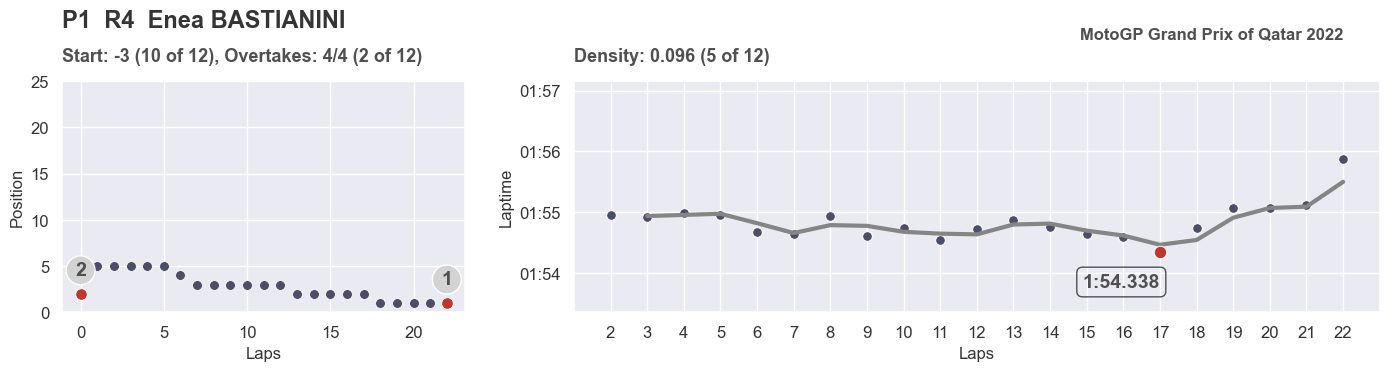

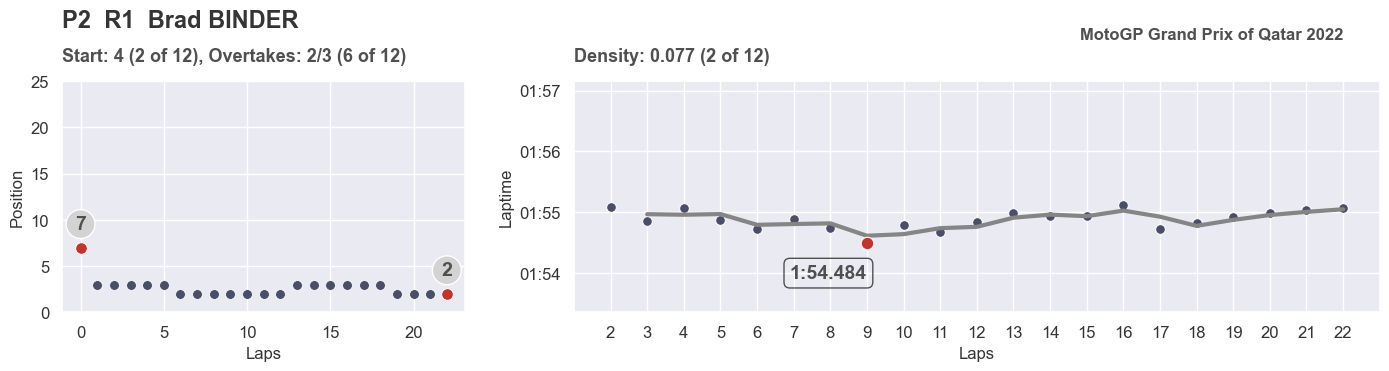

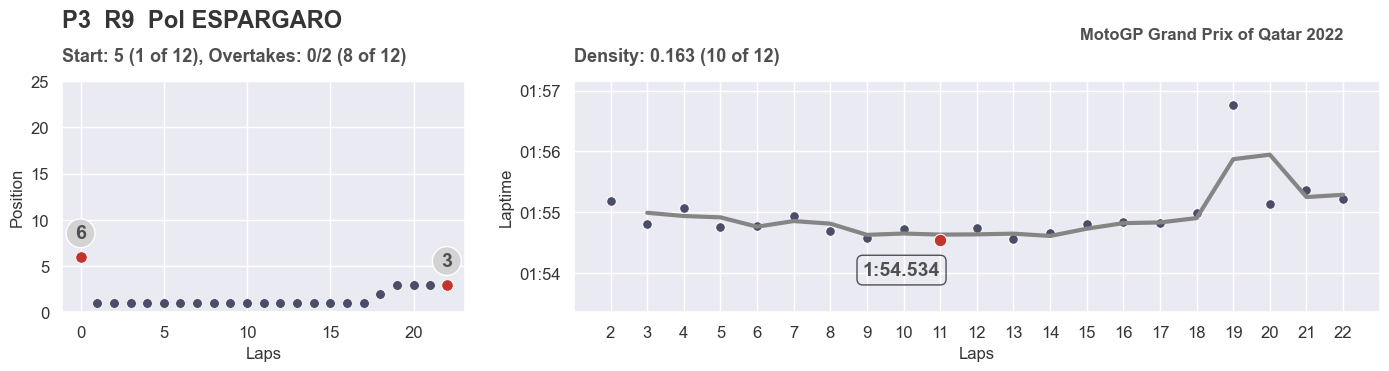

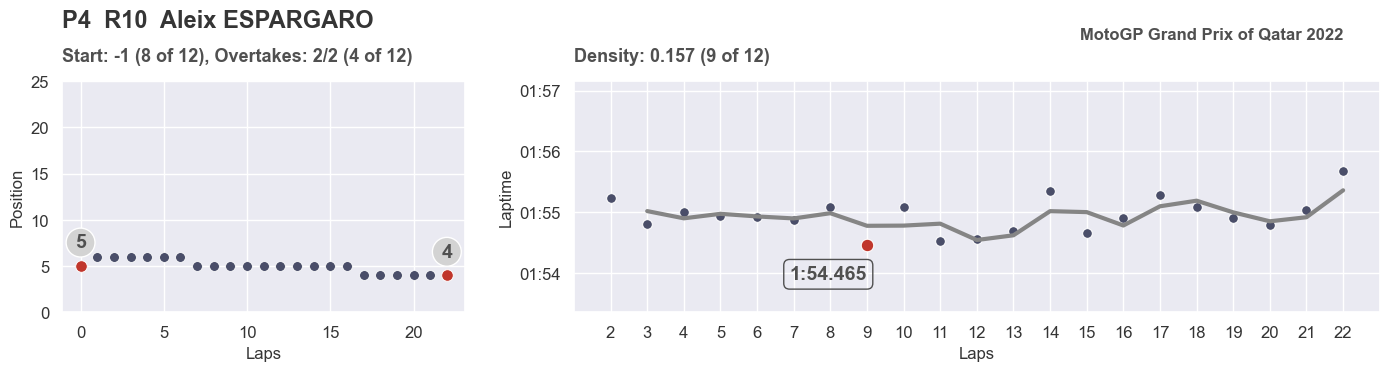

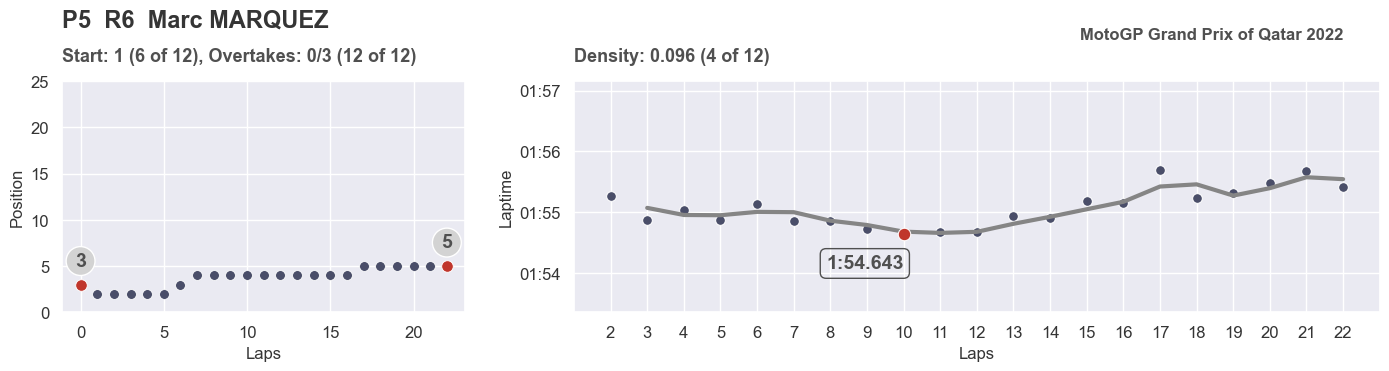

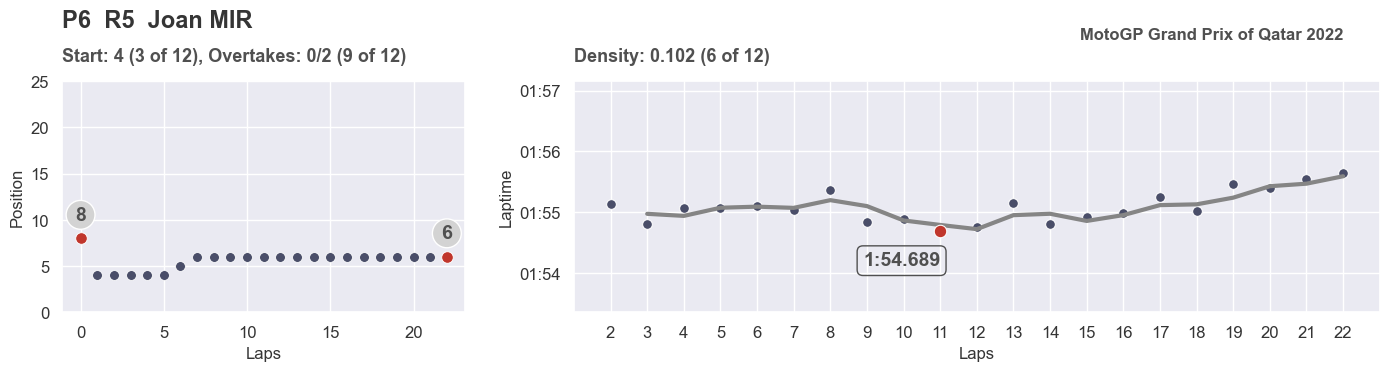

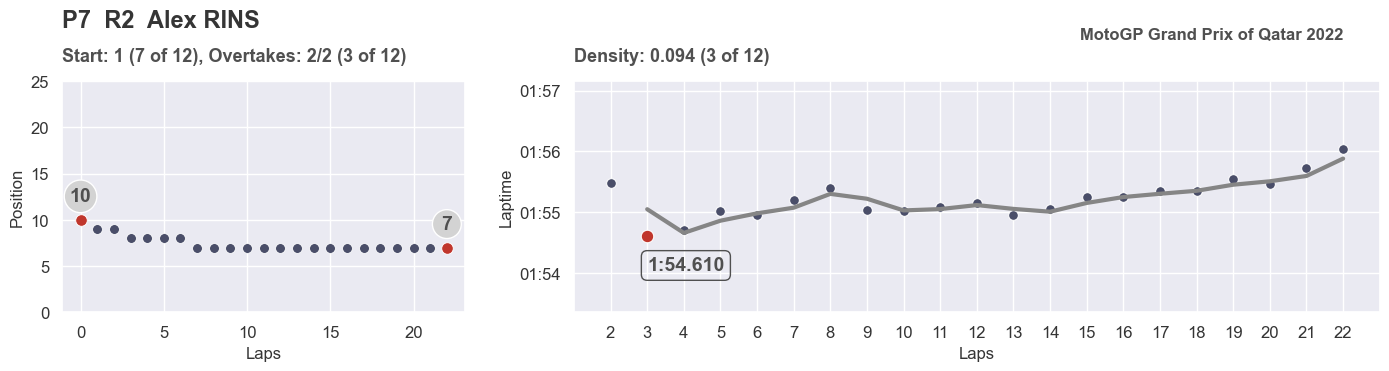

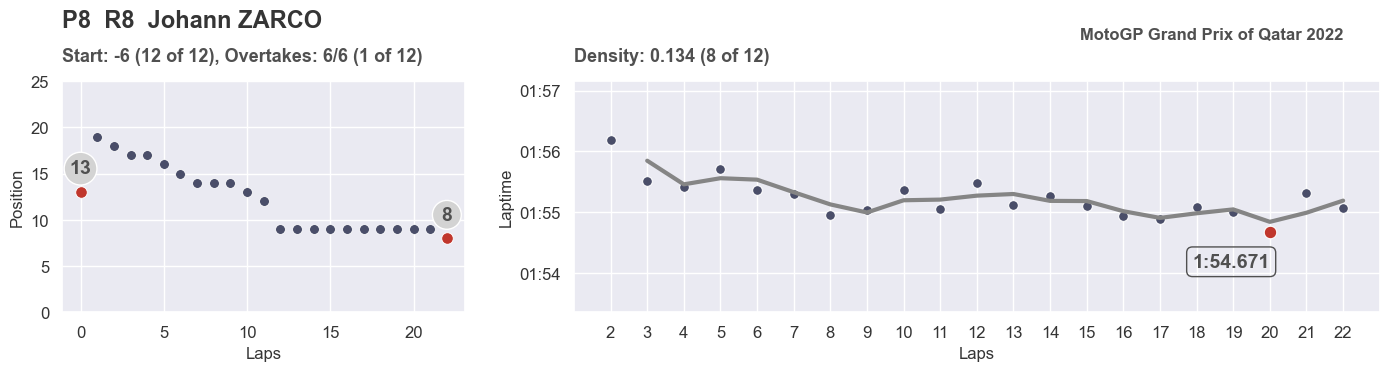

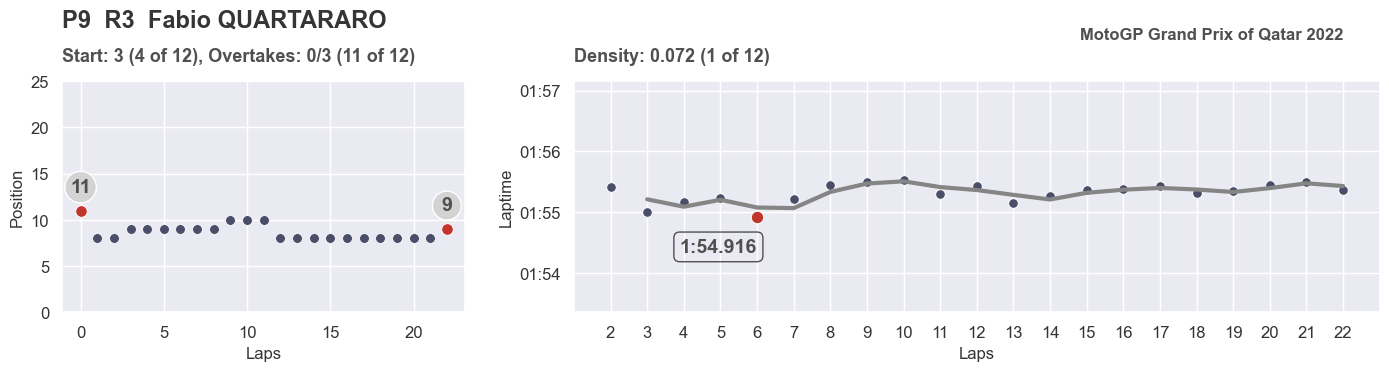

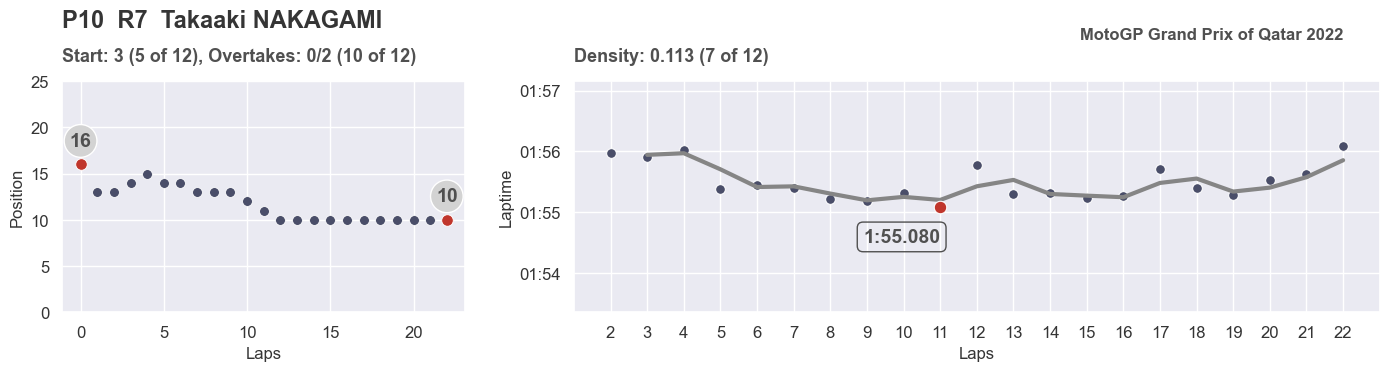

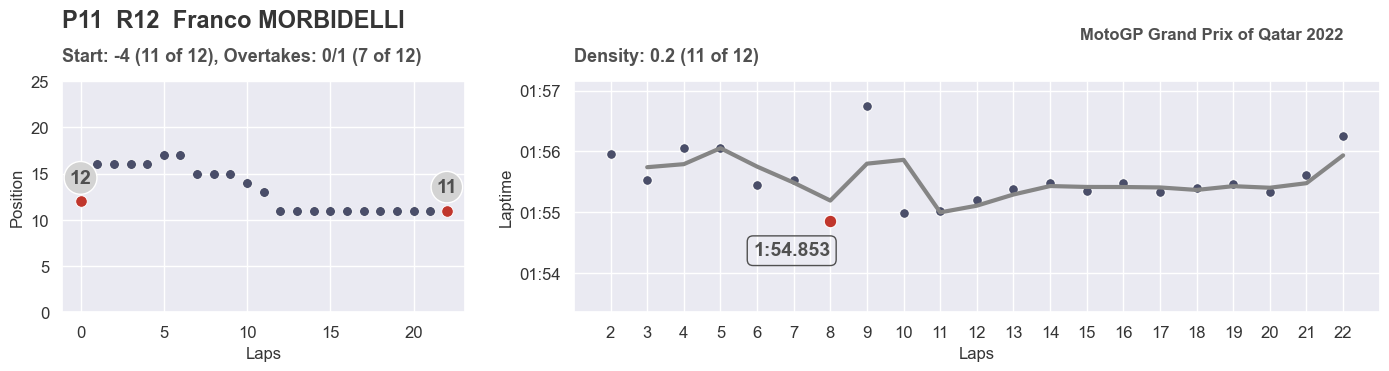

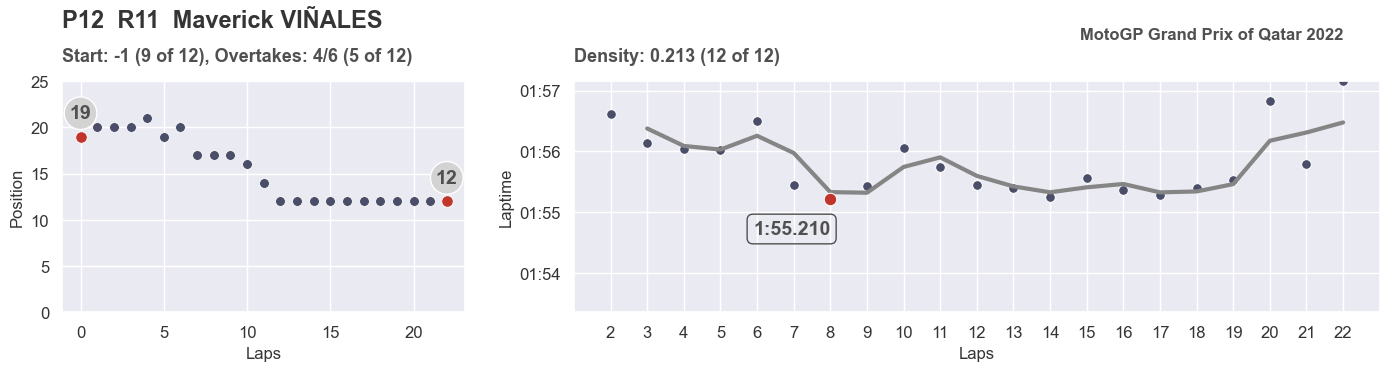

In [90]:
for i in range(1,13):
    plot = plot_summary_create(
        analysis_df, moving_average_df, positions_df, points_df,
        summary_df, riders_finished_df, grand_prix_name_title,
        name=None, position=i, rating=None)
    
    display(plot)

In [91]:
name = None
position = 3
rating = None

if name:
    name = name

if position:
    name = summary_df.loc[summary_df['finish']==position, 'rider'].item()

if rating:
    name = points_df.loc[rating, 'rider']

plot = plot_summary_create(
    analysis_df, moving_average_df, positions_df, points_df,
    summary_df, riders_finished_df, grand_prix_name_title,
    name=name, position=position, rating=rating)

name_file = '_'.join(name.lower().split())
plot_file_name = year_name + '_' + grand_prix_name_file + '_' + name_file

plot.savefig(plot_file_name + '.png', bbox_inches='tight')

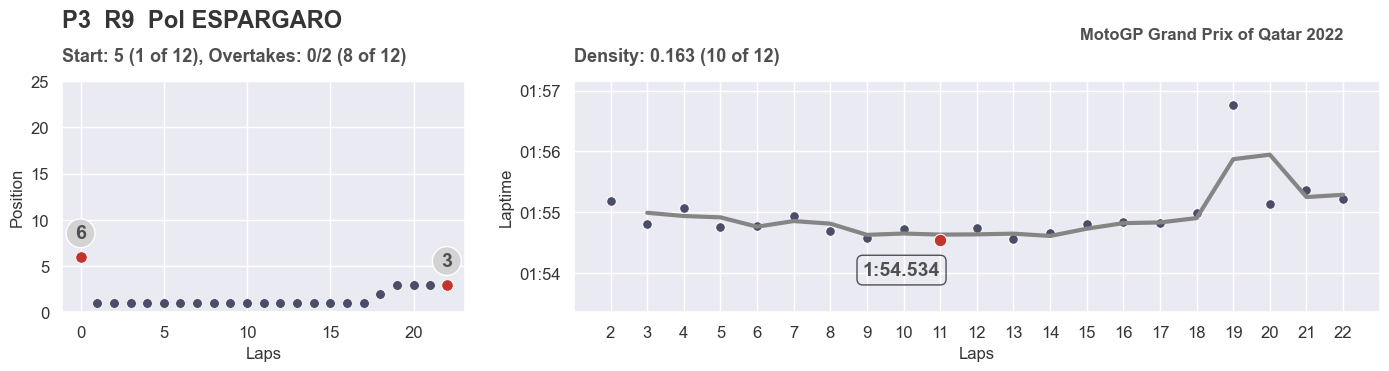

In [92]:
plot